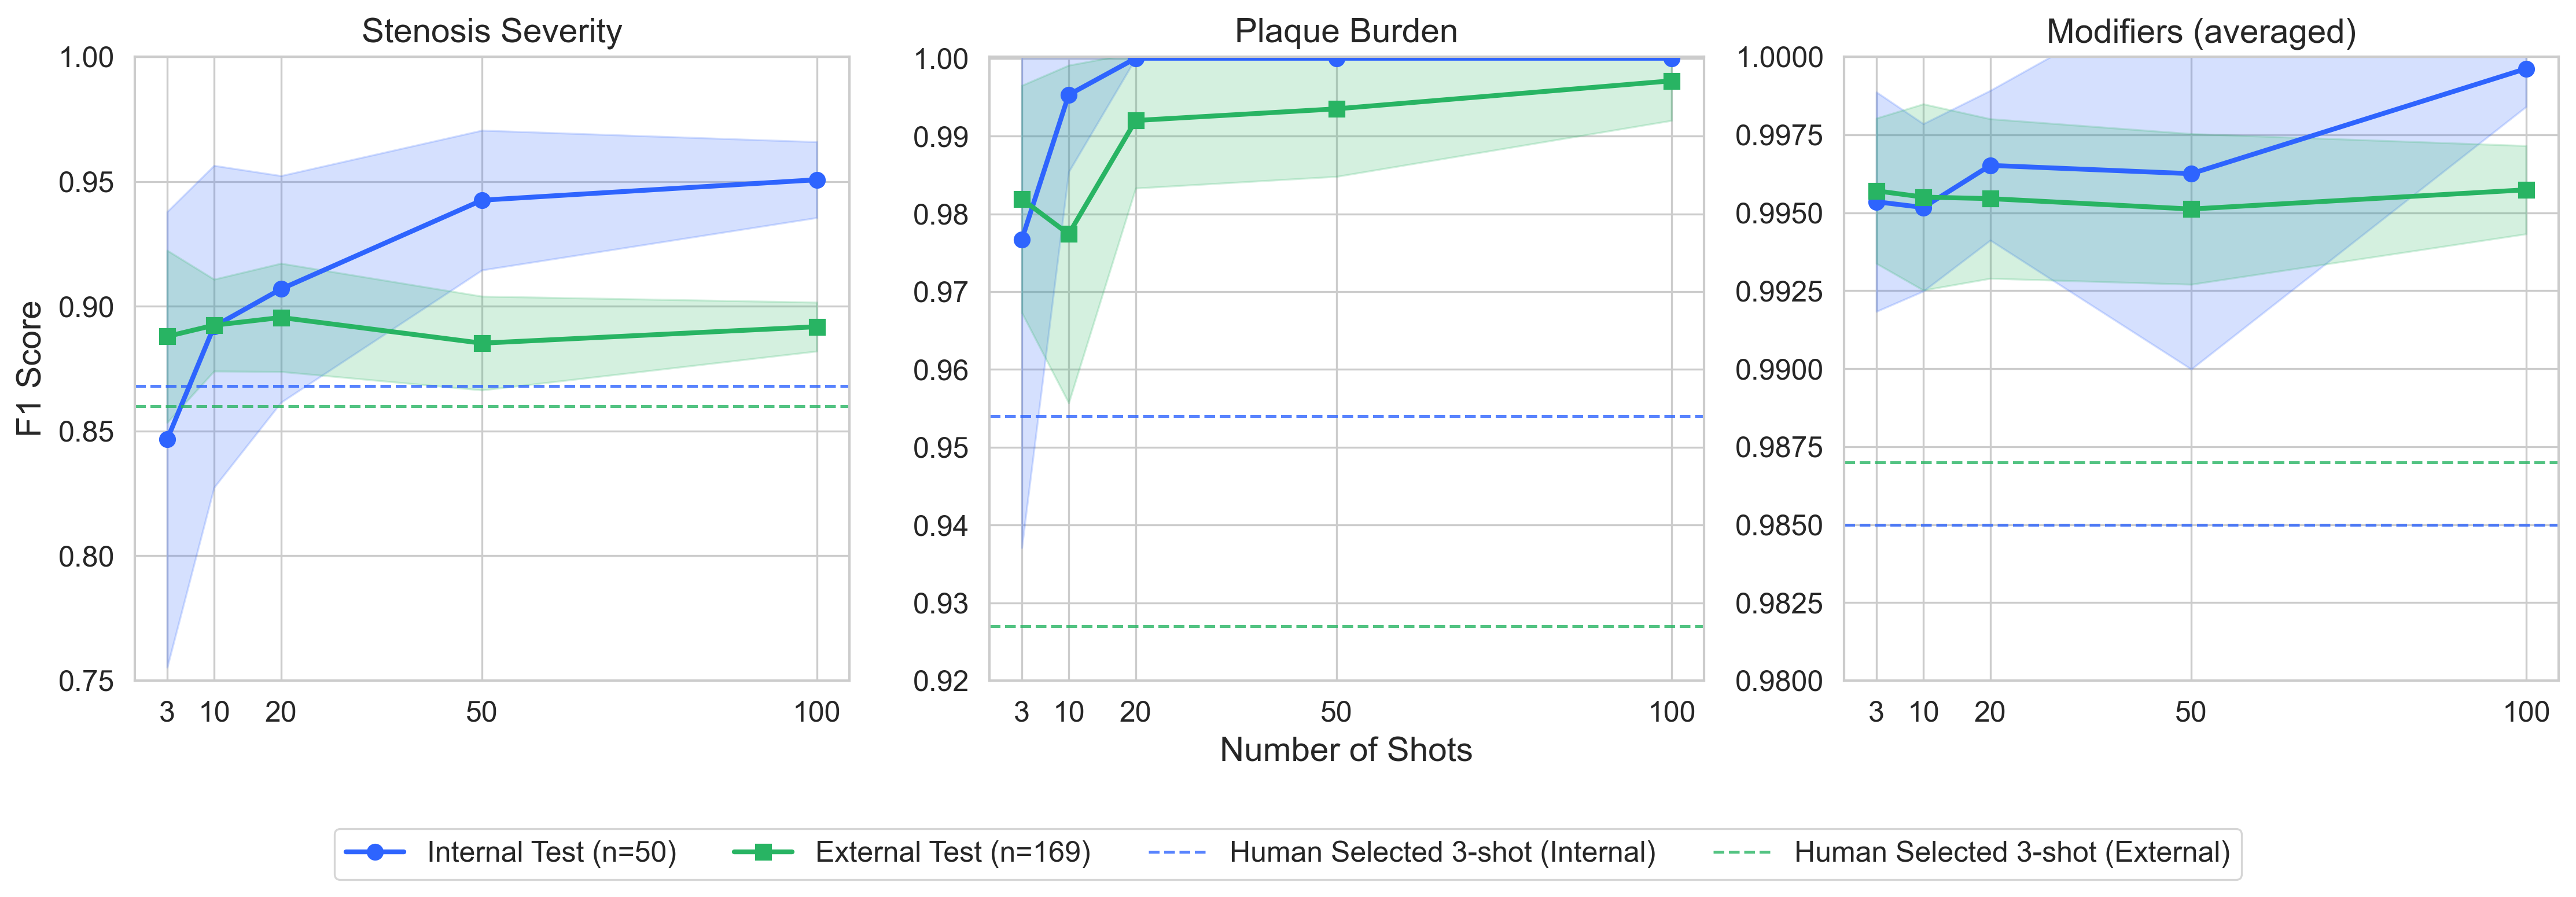

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Data for CAD-RADS (first plot)
internal_means1 = np.array([0.8466, 0.8919, 0.9069, 0.9425, 0.9507])
internal_stds1 = np.array([0.0913, 0.0645, 0.0454, 0.0280, 0.0152])
external_means1 = np.array([0.8879, 0.8924, 0.8955, 0.8852, 0.8918])
external_stds1 = np.array([0.0345, 0.0184, 0.0217, 0.0188, 0.0098])

# Data for Plaque Burden (second plot)
internal_means2 = np.array([0.9767, 0.9953, 1.0000, 1.0000, 1.0000])
internal_stds2 = np.array([0.0396, 0.0099, 0.0000, 0.0000, 0.0000])
external_means2 = np.array([0.9819, 0.9774, 0.9920, 0.9935, 0.9971])
external_stds2 = np.array([0.0146, 0.0217, 0.0087, 0.0087, 0.0051])

# Data for Modifiers (third plot)
internal_means3 = np.array([
    np.mean([0.9761, 1.0000, 1.0000, 1.0000, 1.0000, 0.9960]),
    np.mean([0.9731, 1.0000, 1.0000, 1.0000, 1.0000, 0.9979]),
    np.mean([0.9791, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
    np.mean([0.9840, 1.0000, 0.9979, 1.0000, 0.9977, 0.9979]),
    np.mean([1.0000, 1.0000, 1.0000, 1.0000, 0.9977, 1.0000])
])
internal_stds3 = np.array([
    np.mean([0.0126, 0, 0, 0, 0, 0.0085]),
    np.mean([0.0095, 0, 0, 0, 0, 0.0066]),
    np.mean([0.0144, 0, 0, 0, 0, 0]),
    np.mean([0.0171, 0, 0.0066, 0, 0.0073, 0.0066]),
    np.mean([0, 0, 0, 0, 0.0073, 0])
])
external_means3 = np.array([
    np.mean([1.0000, 1.0000, 0.9854, 0.9938, 0.9956, 0.9994]),
    np.mean([1.0000, 1.0000, 0.9883, 0.9937, 0.9910, 1.0000]),
    np.mean([1.0000, 1.0000, 0.9855, 0.9953, 0.9931, 0.9988]),
    np.mean([1.0000, 1.0000, 0.9827, 0.9959, 0.9921, 1.0000]),
    np.mean([1.0000, 1.0000, 0.9784, 0.9989, 0.9971, 1.0000])
])
external_stds3 = np.array([
    np.mean([0, 0, 0.0049, 0.0041, 0.0031, 0.0019, 0.0023]),
    np.mean([0, 0, 0.005, 0.0033, 0.0096, 0, 0.0030]),
    np.mean([0, 0, 0.0046, 0.0047, 0.0035, 0.0025, 0.0026]),
    np.mean([0, 0, 0.0048, 0.0056, 0.0041, 0, 0.0024]),
    np.mean([0, 0, 0.0031, 0.0024, 0.003, 0, 0.0014])
])

# Function to plot each subplot
def plot_performance(ax, internal_means, internal_stds, external_means, external_stds, 
                    title, human_internal, human_external, ylim, show_y_label=False, show_x_label=False):
    lines = []
    # Plot internal test
    l1 = ax.plot(n_shots, internal_means, '-o', color='#2E64FE', linewidth=2, markersize=6)[0]
    ax.fill_between(n_shots, 
                    internal_means - internal_stds,
                    internal_means + internal_stds,
                    color='#2E64FE', alpha=0.2)
    
    # Plot external test
    l2 = ax.plot(n_shots, external_means, '-s', color='#28B463', linewidth=2, markersize=6)[0]
    ax.fill_between(n_shots,
                    external_means - external_stds,
                    external_means + external_stds,
                    color='#28B463', alpha=0.2)
    
    # Plot horizontal lines
    l3 = ax.axhline(y=human_internal, color='#2E64FE', linestyle='--', alpha=0.8)
    l4 = ax.axhline(y=human_external, color='#28B463', linestyle='--', alpha=0.8)
    
    # Set labels
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
    
    if show_y_label:
        ax.set_ylabel('F1 Score')
    else:
        ax.set_ylabel('')
    
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    
    return [l1, l2, l3, l4]

# Plot each subplot
lines1 = plot_performance(ax1, internal_means1, internal_stds1, external_means1, external_stds1, 
                'Stenosis Severity', 0.868, 0.860, [0.75, 1.0], show_y_label=True)
lines2 = plot_performance(ax2, internal_means2, internal_stds2, external_means2, external_stds2, 
                'Plaque Burden', 0.954, 0.927, [0.92, 1.0002], show_x_label=True)
lines3 = plot_performance(ax3, internal_means3, internal_stds3, external_means3, external_stds3, 
                'Modifiers (averaged)', 0.985, 0.987, [0.98, 1.0])

# Add single legend at the bottom
labels = ['Internal Test (n=50)', 'External Test (n=169)', 
          'Human Selected 3-shot (Internal)', 'Human Selected 3-shot (External)']
fig.legend(lines1, labels, 
          loc='center', 
          bbox_to_anchor=(0.5, -0.0),
          ncol=4,
          frameon=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for the legend

plt.show()

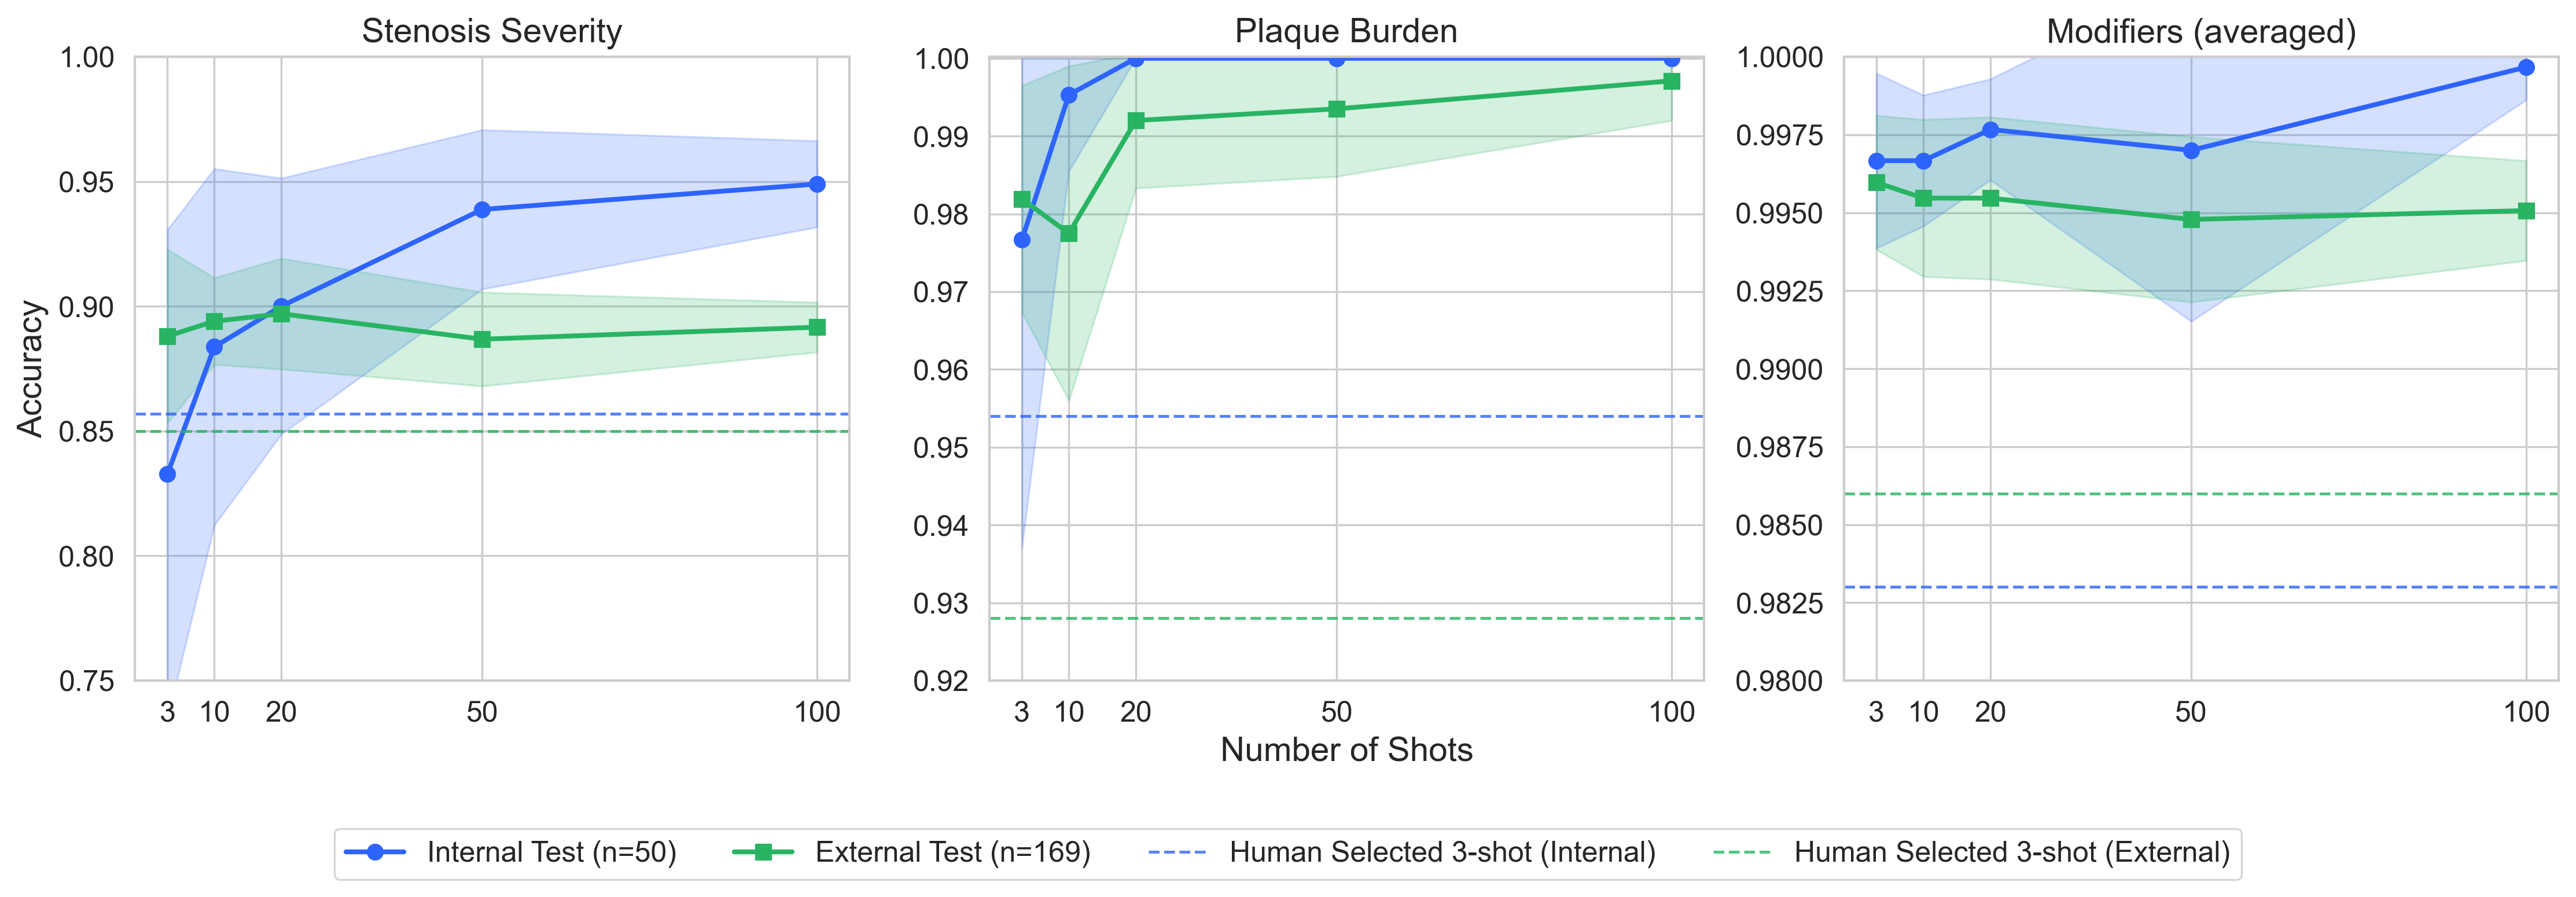

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Data for CAD-RADS (first plot)
internal_means1 = np.array([0.8327, 0.8837, 0.9000, 0.9388, 0.9490])
internal_stds1 = np.array([0.0980, 0.0714, 0.0513, 0.0319, 0.0173])
external_means1 = np.array([0.8880, 0.8940, 0.8970, 0.8868, 0.8916])
external_stds1 = np.array([0.0348, 0.0174, 0.0222, 0.0188, 0.0100])

# Data for Plaque Burden (second plot)
internal_means2 = np.array([0.9767, 0.9953, 1., 1., 1.])
internal_stds2 = np.array([0.0395, 0.0098, 0., 0., 0.])
external_means2 = np.array([0.9819, 0.9775, 0.9920, 0.9935, 0.9971])
external_stds2 = np.array([0.0146, 0.0215, 0.0087, 0.0087, 0.0051])

# Data for Modifiers (third plot)
internal_means3 = np.array([
    np.mean([0.9840, 1., 1., 1., 1., 0.9960]),
    np.mean([0.9820, 1., 1., 1., 1., 0.9980]),
    np.mean([0.9860, 1., 1., 1., 1., 1.]),
    np.mean([0.9880, 1., 0.9980, 1., 0.9980, 0.9980]),
    np.mean([1., 1., 1., 1., 0.9980, 1.])
])
internal_stds3 = np.array([
    np.mean([0.0084, 0, 0, 0, 0, 0.0084]),
    np.mean([0.0063, 0, 0, 0, 0, 0.0063]),
    np.mean([0.0097, 0, 0, 0, 0, 0]),
    np.mean([0.0140, 0, 0.0063, 0, 0.0063, 0.0063]),
    np.mean([0, 0, 0, 0, 0.0063, 0])
])
external_means3 = np.array([
    np.mean([1., 1., 0.9870, 0.9935, 0.9959, 0.9994]),
    np.mean([1., 1., 0.9870, 0.9935, 0.9923, 1.]),
    np.mean([1., 1., 0.9852, 0.9953, 0.9935, 0.9988]),
    np.mean([1., 1., 0.9805, 0.9959, 0.9923, 1.]),
    np.mean([1., 1., 0.9746, 0.9988, 0.9970, 1.])
])
external_stds3 = np.array([
    np.mean([0, 0, 0.0037, 0.0044, 0.0029, 0.0019]),
    np.mean([0, 0, 0.0054, 0.0034, 0.0063, 0]),
    np.mean([0, 0, 0.0050, 0.0047, 0.0034, 0.0025]),
    np.mean([0, 0, 0.0063, 0.0056, 0.0040, 0]),
    np.mean([0, 0, 0.0040, 0.0025, 0.0031, 0])
])

# Function to plot each subplot
def plot_performance(ax, internal_means, internal_stds, external_means, external_stds, 
                    title, human_internal, human_external, ylim, show_y_label=False, show_x_label=False):
    lines = []
    # Plot internal test
    l1 = ax.plot(n_shots, internal_means, '-o', color='#2E64FE', linewidth=2, markersize=6)[0]
    ax.fill_between(n_shots, 
                    internal_means - internal_stds,
                    internal_means + internal_stds,
                    color='#2E64FE', alpha=0.2)
    
    # Plot external test
    l2 = ax.plot(n_shots, external_means, '-s', color='#28B463', linewidth=2, markersize=6)[0]
    ax.fill_between(n_shots,
                    external_means - external_stds,
                    external_means + external_stds,
                    color='#28B463', alpha=0.2)
    
    # Plot horizontal lines
    l3 = ax.axhline(y=human_internal, color='#2E64FE', linestyle='--', alpha=0.8)
    l4 = ax.axhline(y=human_external, color='#28B463', linestyle='--', alpha=0.8)
    
    # Set labels
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
    
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
    
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    
    return [l1, l2, l3, l4]

# Plot each subplot
lines1 = plot_performance(ax1, internal_means1, internal_stds1, external_means1, external_stds1, 
                'Stenosis Severity', 0.857, 0.850, [0.75, 1.0], show_y_label=True)
lines2 = plot_performance(ax2, internal_means2, internal_stds2, external_means2, external_stds2, 
                'Plaque Burden', 0.954, 0.928, [0.92, 1.0002], show_x_label=True)
lines3 = plot_performance(ax3, internal_means3, internal_stds3, external_means3, external_stds3, 
                'Modifiers (averaged)', 0.983, 0.986, [0.98, 1.0])

# Add single legend at the bottom
labels = ['Internal Test (n=50)', 'External Test (n=169)', 
          'Human Selected 3-shot (Internal)', 'Human Selected 3-shot (External)']
fig.legend(lines1, labels, 
          loc='center', 
          bbox_to_anchor=(0.5, -0.0),
          ncol=4,
          frameon=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for the legend

plt.show()

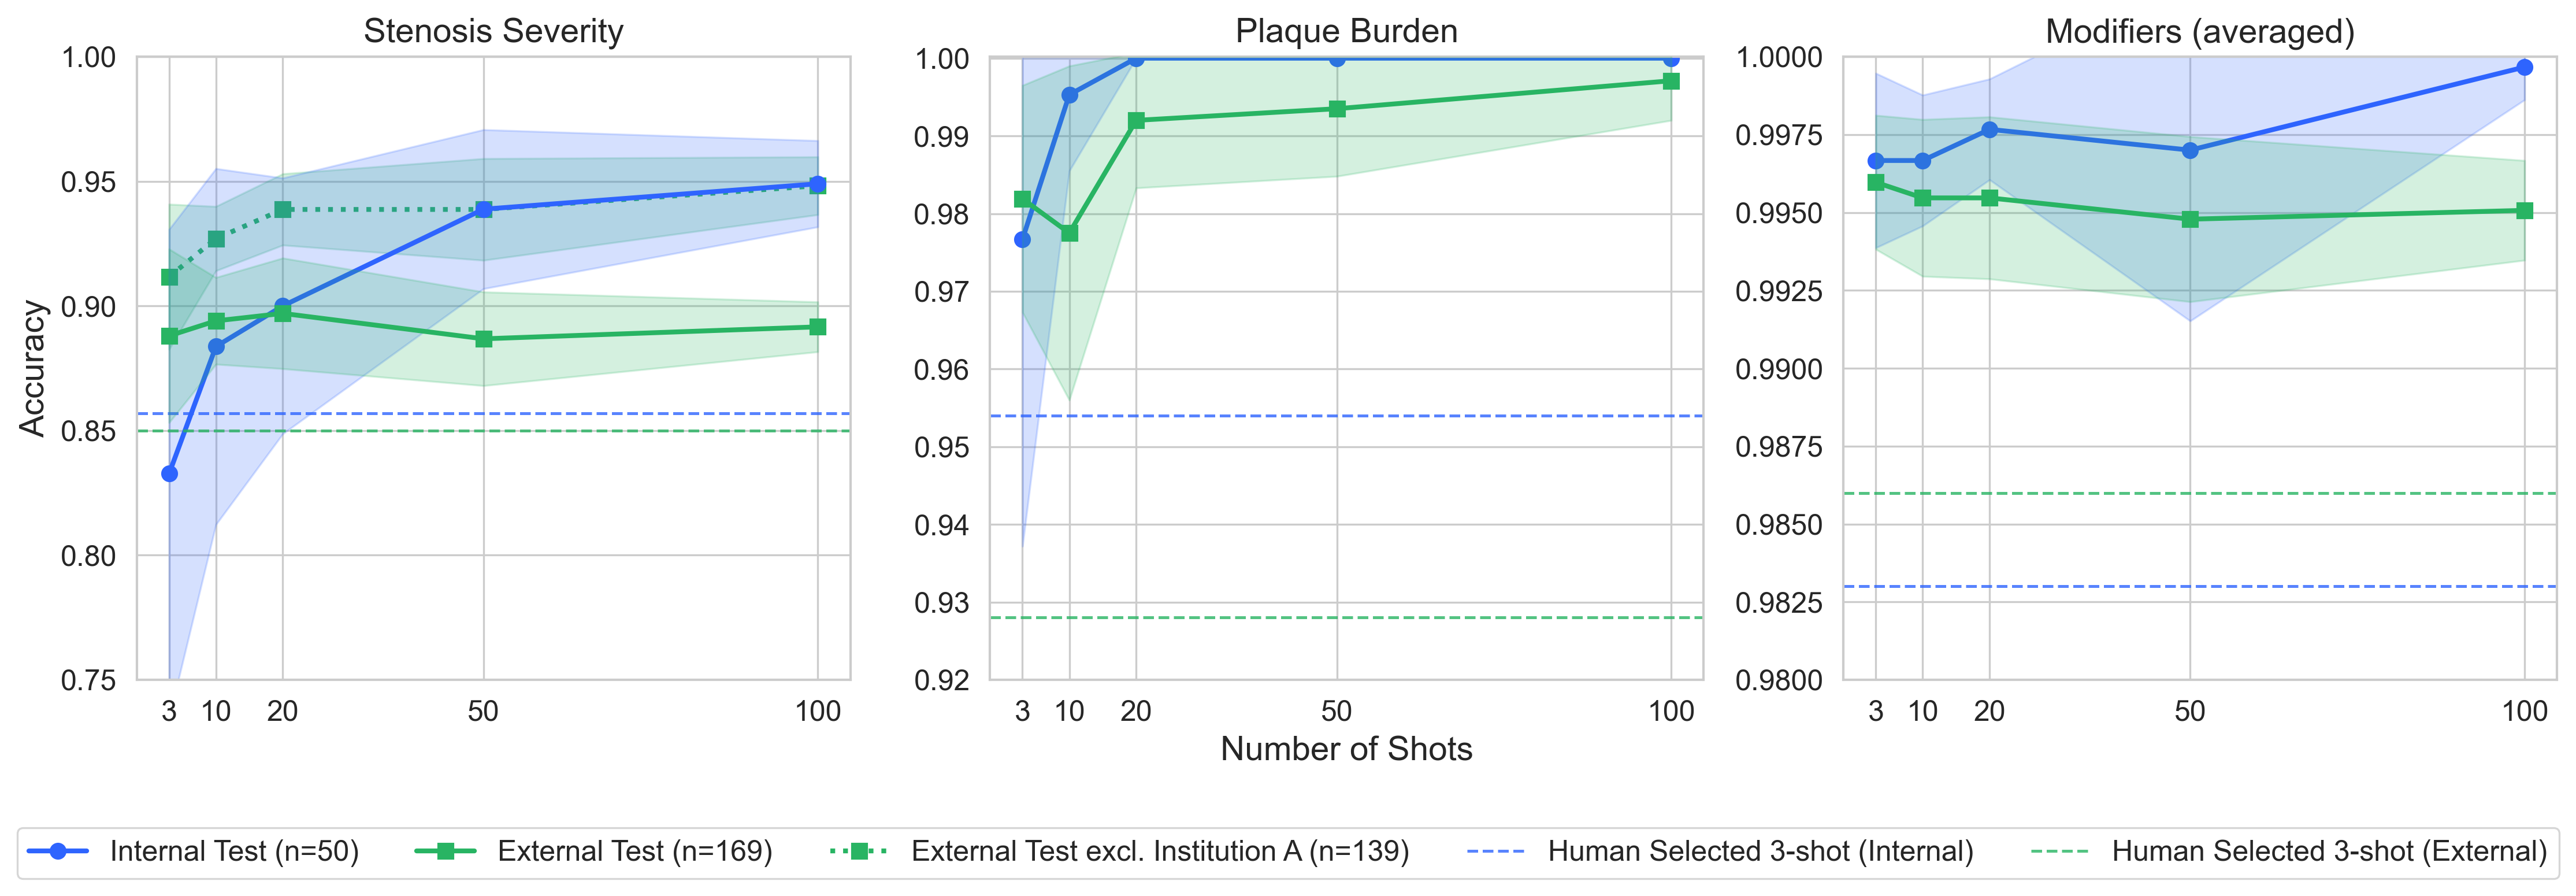

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Data for CAD-RADS (first plot)
internal_means1 = np.array([0.8327, 0.8837, 0.9000, 0.9388, 0.9490])
internal_stds1 = np.array([0.0980, 0.0714, 0.0513, 0.0319, 0.0173])
external_means1 = np.array([0.8880, 0.8940, 0.8970, 0.8868, 0.8916])
external_stds1 = np.array([0.0348, 0.0174, 0.0222, 0.0188, 0.0100])
external_except_means1 = np.array([0.9117, 0.9270, 0.9387, 0.9387, 0.9482])
external_except_stds1 = np.array([0.0291, 0.0129, 0.0143, 0.0204, 0.0116])

# Data for Plaque Burden (second plot)
internal_means2 = np.array([0.9767, 0.9953, 1., 1., 1.])
internal_stds2 = np.array([0.0395, 0.0098, 0., 0., 0.])
external_means2 = np.array([0.9819, 0.9775, 0.9920, 0.9935, 0.9971])
external_stds2 = np.array([0.0146, 0.0215, 0.0087, 0.0087, 0.0051])

# Data for Modifiers (third plot)
internal_means3 = np.array([
    np.mean([0.9840, 1., 1., 1., 1., 0.9960]),
    np.mean([0.9820, 1., 1., 1., 1., 0.9980]),
    np.mean([0.9860, 1., 1., 1., 1., 1.]),
    np.mean([0.9880, 1., 0.9980, 1., 0.9980, 0.9980]),
    np.mean([1., 1., 1., 1., 0.9980, 1.])
])
internal_stds3 = np.array([
    np.mean([0.0084, 0, 0, 0, 0, 0.0084]),
    np.mean([0.0063, 0, 0, 0, 0, 0.0063]),
    np.mean([0.0097, 0, 0, 0, 0, 0]),
    np.mean([0.0140, 0, 0.0063, 0, 0.0063, 0.0063]),
    np.mean([0, 0, 0, 0, 0.0063, 0])
])
external_means3 = np.array([
    np.mean([1., 1., 0.9870, 0.9935, 0.9959, 0.9994]),
    np.mean([1., 1., 0.9870, 0.9935, 0.9923, 1.]),
    np.mean([1., 1., 0.9852, 0.9953, 0.9935, 0.9988]),
    np.mean([1., 1., 0.9805, 0.9959, 0.9923, 1.]),
    np.mean([1., 1., 0.9746, 0.9988, 0.9970, 1.])
])
external_stds3 = np.array([
    np.mean([0, 0, 0.0037, 0.0044, 0.0029, 0.0019]),
    np.mean([0, 0, 0.0054, 0.0034, 0.0063, 0]),
    np.mean([0, 0, 0.0050, 0.0047, 0.0034, 0.0025]),
    np.mean([0, 0, 0.0063, 0.0056, 0.0040, 0]),
    np.mean([0, 0, 0.0040, 0.0025, 0.0031, 0])
])

# Function to plot each subplot
def plot_performance(ax, internal_means, internal_stds, external_means, external_stds, 
                    title, human_internal, human_external, ylim,
                    external_except_means=None, external_except_stds=None,
                    show_y_label=False, show_x_label=False):
    
    lines = []
    # Plot internal test
    l1 = ax.plot(n_shots, internal_means, '-o', color='#2E64FE', linewidth=2, markersize=6, zorder=2)[0]
    ax.fill_between(n_shots, 
                    internal_means - internal_stds,
                    internal_means + internal_stds,
                    color='#2E64FE', alpha=0.2, zorder=2)
    
    # Plot external test
    l2 = ax.plot(n_shots, external_means, '-s', color='#28B463', linewidth=2, markersize=6, zorder=3)[0]
    ax.fill_between(n_shots,
                    external_means - external_stds,
                    external_means + external_stds,
                    color='#28B463', alpha=0.2, zorder=3)
    
    # Plot external test (except A) if provided
    if external_except_means is not None:
        l5 = ax.plot(n_shots, external_except_means, ':s', color='#28B463', linewidth=2, markersize=6, zorder=1)[0]
        ax.fill_between(n_shots,
                        external_except_means - external_except_stds,
                        external_except_means + external_except_stds,
                        color='#28B463', alpha=0.2, zorder=1)
    else:
        l5 = None
    
    # Plot horizontal lines
    l3 = ax.axhline(y=human_internal, color='#2E64FE', linestyle='--', alpha=0.8)
    l4 = ax.axhline(y=human_external, color='#28B463', linestyle='--', alpha=0.8)
    
    # Set labels
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
    
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
    
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    
    if l5 is not None:
        return [l1, l2, l5, l3, l4]
    return [l1, l2, l3, l4]

# Plot each subplot
lines1 = plot_performance(ax1, internal_means1, internal_stds1, external_means1, external_stds1,
                'Stenosis Severity', 0.857, 0.850, [0.75, 1.0],
                external_except_means1, external_except_stds1,
                show_y_label=True)
lines2 = plot_performance(ax2, internal_means2, internal_stds2, external_means2, external_stds2, 
                'Plaque Burden', 0.954, 0.928, [0.92, 1.0002],
                show_x_label=True)
lines3 = plot_performance(ax3, internal_means3, internal_stds3, external_means3, external_stds3,
                'Modifiers (averaged)', 0.983, 0.986, [0.98, 1.0])

# Add single legend at the bottom
labels = ['Internal Test (n=50)', 'External Test (n=169)', 'External Test excl. Institution A (n=139)',
          'Human Selected 3-shot (Internal)', 'Human Selected 3-shot (External)']
fig.legend(lines1, labels, 
          loc='center', 
          bbox_to_anchor=(0.5, -0.0),
          ncol=5,
          frameon=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for the legend

plt.show()

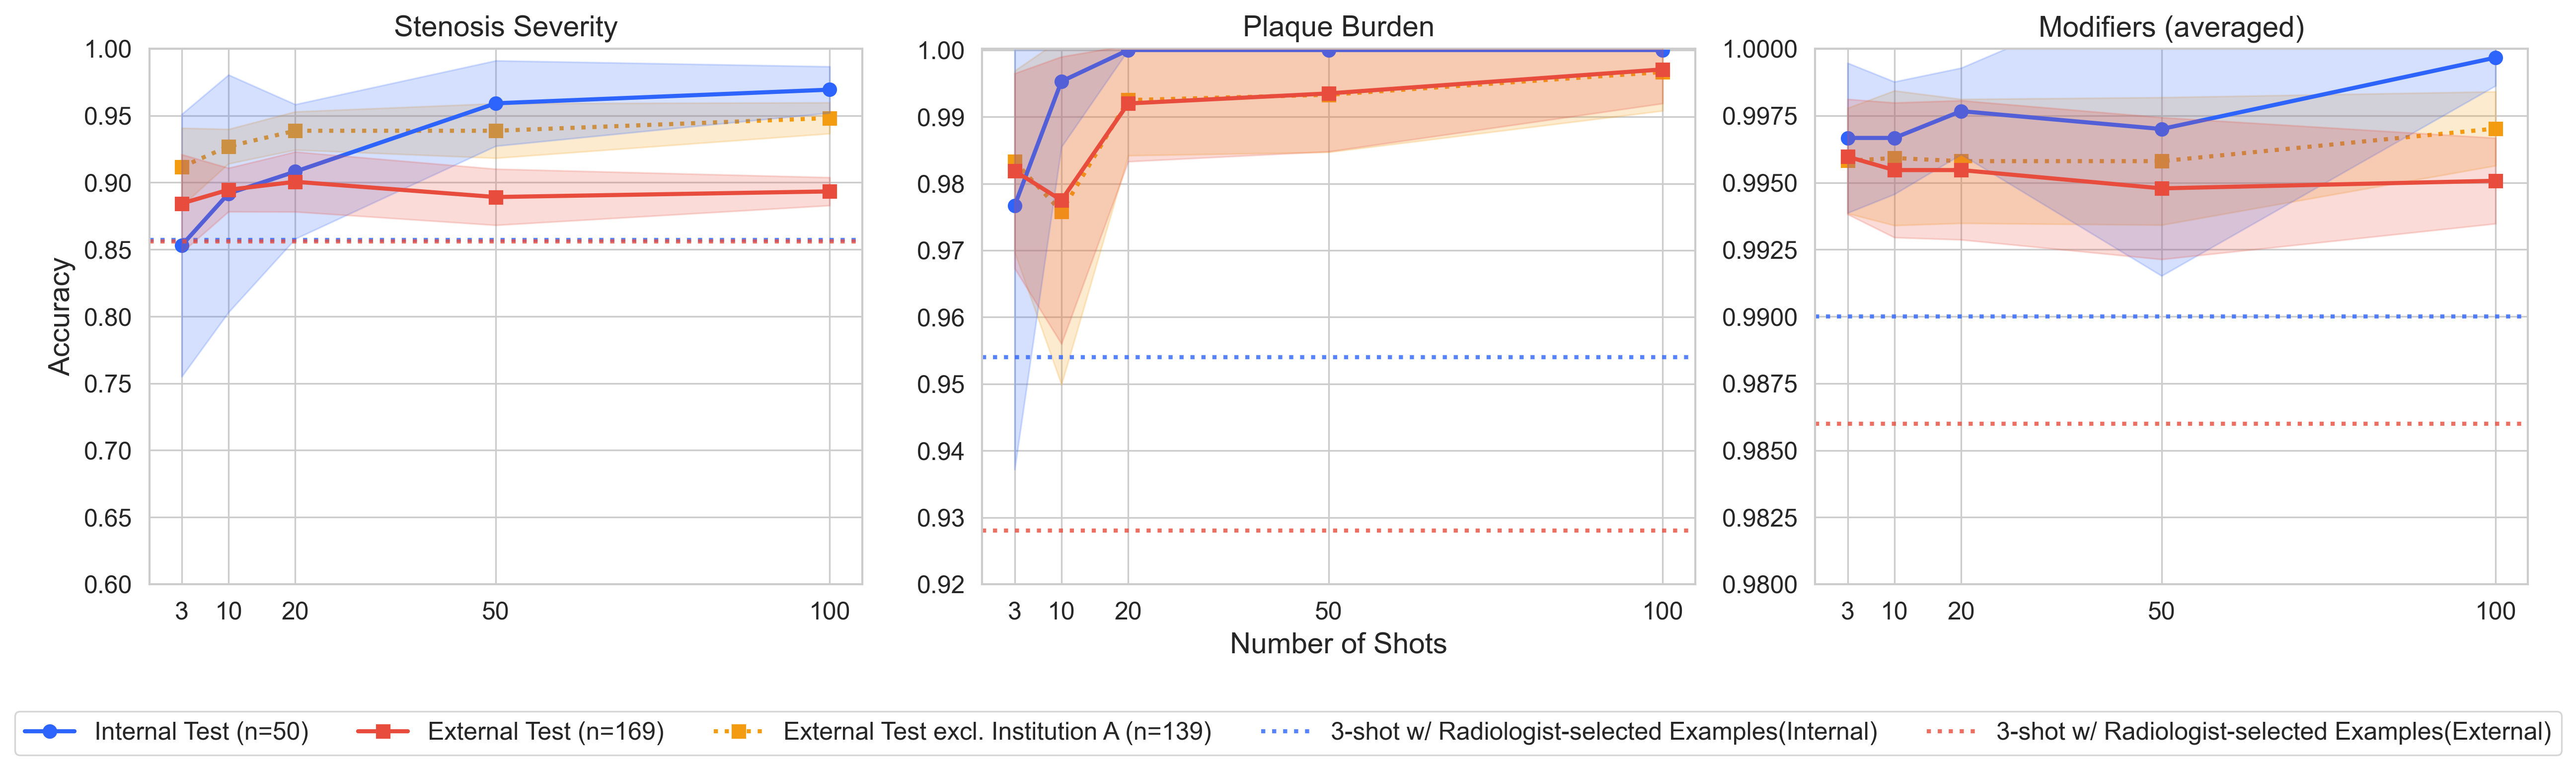

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Data for CAD-RADS (first plot)
internal_means1 = np.array([0.8531, 0.8918, 0.9082, 0.9592, 0.9694])
internal_stds1 = np.array([0.0980, 0.0887, 0.0502, 0.0319, 0.0173])
external_means1 = np.array([0.8844, 0.8946, 0.9006, 0.8892, 0.8934])
external_stds1 = np.array([0.0366, 0.0163, 0.0224, 0.0210, 0.0105])
external_except_means1 = np.array([0.9117, 0.9270, 0.9387, 0.9387, 0.9482])
external_except_stds1 = np.array([0.0291, 0.0129, 0.0143, 0.0204, 0.0116])

# Data for Plaque Burden (second plot)
internal_means2 = np.array([0.9767, 0.9953, 1., 1., 1.])
internal_stds2 = np.array([0.0395, 0.0098, 0., 0., 0.])
external_means2 = np.array([0.9819, 0.9775, 0.9920, 0.9935, 0.9971])
external_stds2 = np.array([0.0146, 0.0215, 0.0087, 0.0087, 0.0051])
# Added external test excluding Institution A data (marked with X)
external_except_means2 = np.array([0.9833, 0.9758, 0.9925, 0.9933, 0.9967])
external_except_stds2 = np.array([0.0136, 0.0259, 0.0083, 0.0086, 0.0058])

# Data for Modifiers (third plot)
internal_means3 = np.array([
    np.mean([0.9840, 1., 1., 1., 1., 0.9960]),
    np.mean([0.9820, 1., 1., 1., 1., 0.9980]),
    np.mean([0.9860, 1., 1., 1., 1., 1.]),
    np.mean([0.9880, 1., 0.9980, 1., 0.9980, 0.9980]),
    np.mean([1., 1., 1., 1., 0.9980, 1.])
])
internal_stds3 = np.array([
    np.mean([0.0084, 0, 0, 0, 0, 0.0084]),
    np.mean([0.0063, 0, 0, 0, 0, 0.0063]),
    np.mean([0.0097, 0, 0, 0, 0, 0]),
    np.mean([0.0140, 0, 0.0063, 0, 0.0063, 0.0063]),
    np.mean([0, 0, 0, 0, 0.0063, 0])
])
external_means3 = np.array([
    np.mean([1., 1., 0.9870, 0.9935, 0.9959, 0.9994]),
    np.mean([1., 1., 0.9870, 0.9935, 0.9923, 1.]),
    np.mean([1., 1., 0.9852, 0.9953, 0.9935, 0.9988]),
    np.mean([1., 1., 0.9805, 0.9959, 0.9923, 1.]),
    np.mean([1., 1., 0.9746, 0.9988, 0.9970, 1.])
])
external_stds3 = np.array([
    np.mean([0, 0, 0.0037, 0.0044, 0.0029, 0.0019]),
    np.mean([0, 0, 0.0054, 0.0034, 0.0063, 0]),
    np.mean([0, 0, 0.0050, 0.0047, 0.0034, 0.0025]),
    np.mean([0, 0, 0.0063, 0.0056, 0.0040, 0]),
    np.mean([0, 0, 0.0040, 0.0025, 0.0031, 0])
])
# Added external test excluding Institution A data (marked with X)
external_except_means3 = np.array([
    np.mean([1., 1., 0.9842, 0.9957, 0.9950, 1.]),
    np.mean([1., 1., 0.9863, 0.9964, 0.9928, 1.]),
    np.mean([1., 1., 0.9856, 0.9957, 0.9935, 1.]),
    np.mean([1., 1., 0.9842, 0.9964, 0.9942, 1.]),
    np.mean([1., 1., 0.9842, 0.9986, 0.9993, 1.])
])
external_except_stds3 = np.array([
    np.mean([0, 0, 0.0046, 0.0037, 0.0035, 0.00]),
    np.mean([0, 0, 0.0041, 0.0051, 0.0059, 0]),
    np.mean([0, 0, 0.0048, 0.0050, 0.0041, 0.0]),
    np.mean([0, 0, 0.0046, 0.0051, 0.0046, 0]),
    np.mean([0, 0, 0.0030, 0.0030, 0.0023, 0])
])

# Function to plot each subplot
def plot_performance(ax, internal_means, internal_stds, external_means, external_stds, 
                    title, human_internal, human_external, ylim,
                    external_except_means=None, external_except_stds=None,
                    show_y_label=False, show_x_label=False):
    
    lines = []
    # Plot internal test
    l1 = ax.plot(n_shots, internal_means, '-o', color='#2E64FE', linewidth=2, markersize=6, zorder=2)[0]
    ax.fill_between(n_shots, 
                    internal_means - internal_stds,
                    internal_means + internal_stds,
                    color='#2E64FE', alpha=0.2, zorder=2)
    
    # Plot external test
    l2 = ax.plot(n_shots, external_means, '-s', color='#E74C3C', linewidth=2, markersize=6, zorder=3)[0]
    ax.fill_between(n_shots,
                    external_means - external_stds,
                    external_means + external_stds,
                    color='#E74C3C', alpha=0.2, zorder=3)
    
    # Plot external test (except A) if provided
    if external_except_means is not None:
        l5 = ax.plot(n_shots, external_except_means, ':s', color='#F39C12', linewidth=2, markersize=6, zorder=1)[0]
        ax.fill_between(n_shots,
                        external_except_means - external_except_stds,
                        external_except_means + external_except_stds,
                        color='#F39C12', alpha=0.2, zorder=1)
    else:
        l5 = None
    
    # Plot horizontal lines
    l3 = ax.axhline(y=human_internal, color='#2E64FE', linestyle=':', alpha=0.8, linewidth=2)
    l4 = ax.axhline(y=human_external, color='#E74C3C', linestyle=':', alpha=0.8, linewidth=2)
    
    # Set labels
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
    
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
    
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    
    if l5 is not None:
        return [l1, l2, l5, l3, l4]
    return [l1, l2, l3, l4]

# Plot each subplot
lines1 = plot_performance(ax1, internal_means1, internal_stds1, external_means1, external_stds1,
                'Stenosis Severity', 0.857, 0.856, [0.6, 1.0],
                external_except_means1, external_except_stds1,
                show_y_label=True)

lines2 = plot_performance(ax2, internal_means2, internal_stds2, external_means2, external_stds2, 
                'Plaque Burden', 0.954, 0.928, [0.92, 1.0002],
                external_except_means2, external_except_stds2,  # Added external except data
                show_x_label=True)

lines3 = plot_performance(ax3, internal_means3, internal_stds3, external_means3, external_stds3,
                'Modifiers (averaged)', 0.990, 0.986, [0.98, 1.0],
                external_except_means3, external_except_stds3)  # Added external except data

# Add single legend at the bottom
labels = ['Internal Test (n=50)', 'External Test (n=169)', 'External Test excl. Institution A (n=139)',
          '3-shot w/ Radiologist-selected Examples(Internal)', '3-shot w/ Radiologist-selected Examples(External)']
fig.legend(lines1, labels, 
          loc='center', 
          bbox_to_anchor=(0.5, -0.0),
          ncol=5,
          frameon=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for the legend

plt.show()

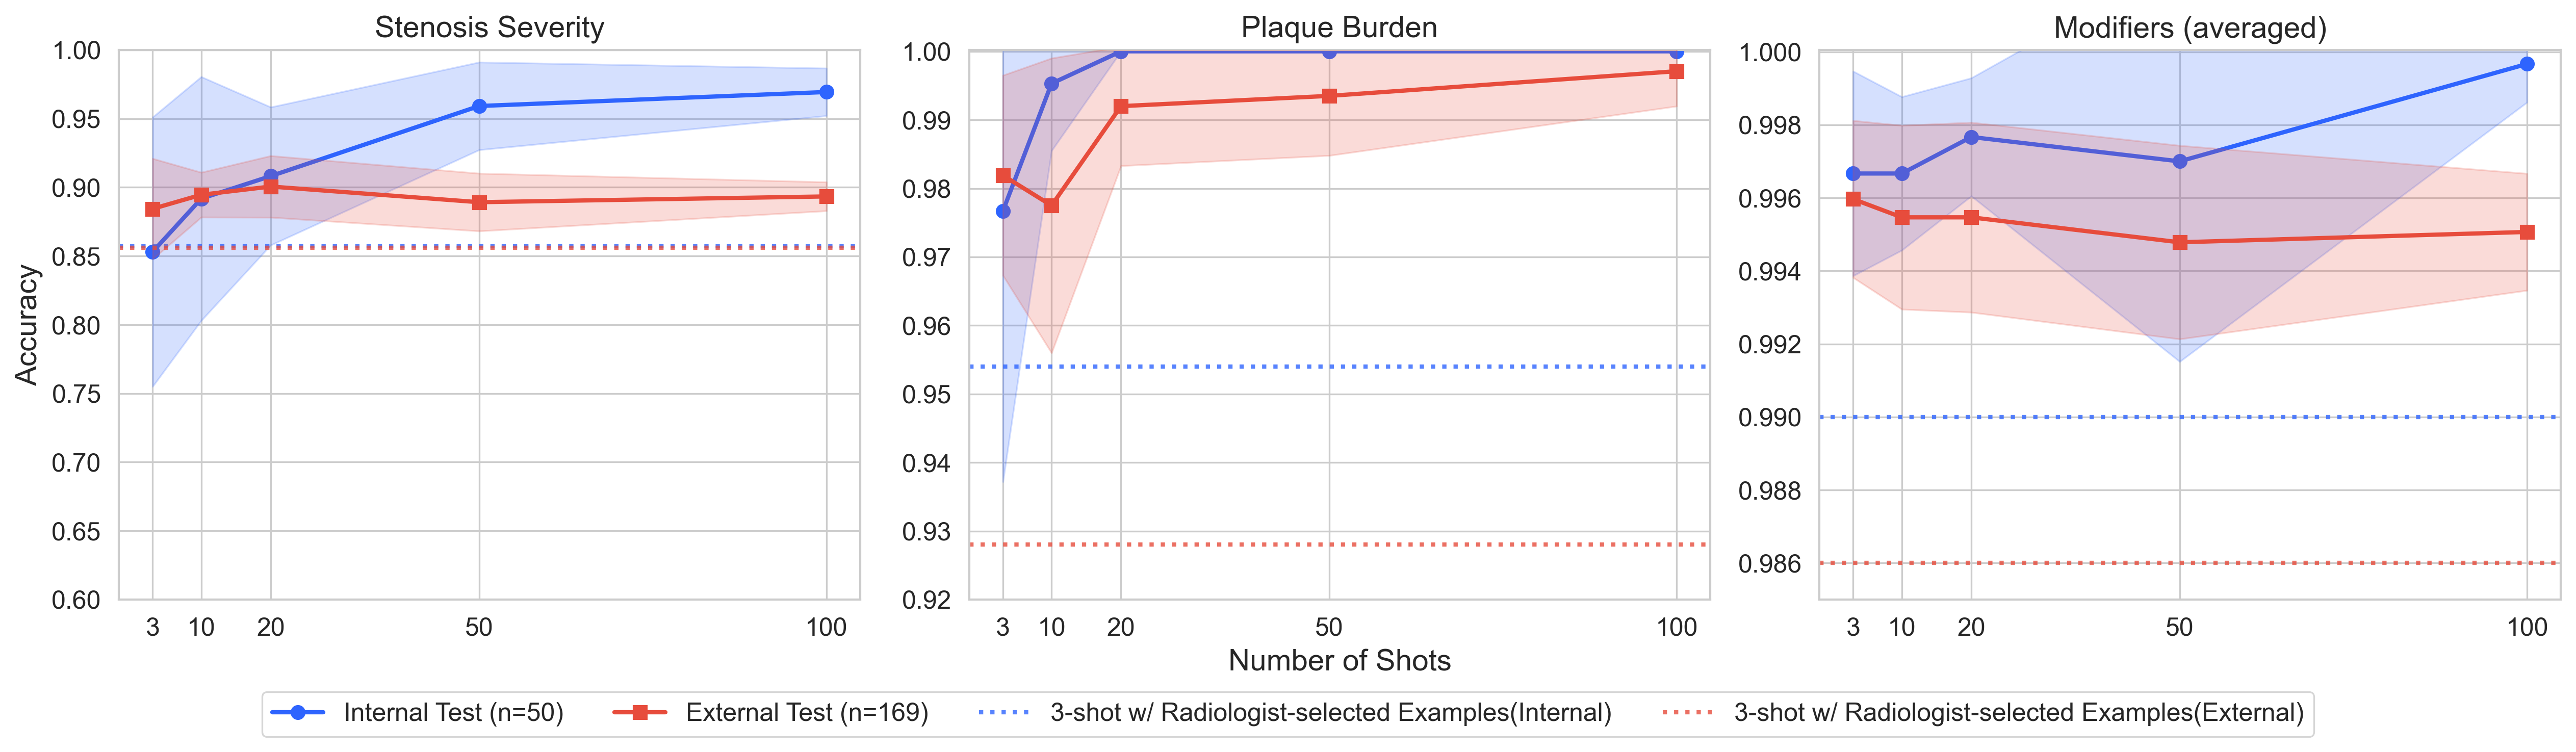

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Data for CAD-RADS (first plot)
internal_means1 = np.array([0.8531, 0.8918, 0.9082, 0.9592, 0.9694])
internal_stds1 = np.array([0.0980, 0.0887, 0.0502, 0.0319, 0.0173])
external_means1 = np.array([0.8844, 0.8946, 0.9006, 0.8892, 0.8934])
external_stds1 = np.array([0.0366, 0.0163, 0.0224, 0.0210, 0.0105])

# Data for Plaque Burden (second plot)
internal_means2 = np.array([0.9767, 0.9953, 1., 1., 1.])
internal_stds2 = np.array([0.0395, 0.0098, 0., 0., 0.])
external_means2 = np.array([0.9819, 0.9775, 0.9920, 0.9935, 0.9971])
external_stds2 = np.array([0.0146, 0.0215, 0.0087, 0.0087, 0.0051])

# Data for Modifiers (third plot)
internal_means3 = np.array([
    np.mean([0.9840, 1., 1., 1., 1., 0.9960]),
    np.mean([0.9820, 1., 1., 1., 1., 0.9980]),
    np.mean([0.9860, 1., 1., 1., 1., 1.]),
    np.mean([0.9880, 1., 0.9980, 1., 0.9980, 0.9980]),
    np.mean([1., 1., 1., 1., 0.9980, 1.])
])
internal_stds3 = np.array([
    np.mean([0.0084, 0, 0, 0, 0, 0.0084]),
    np.mean([0.0063, 0, 0, 0, 0, 0.0063]),
    np.mean([0.0097, 0, 0, 0, 0, 0]),
    np.mean([0.0140, 0, 0.0063, 0, 0.0063, 0.0063]),
    np.mean([0, 0, 0, 0, 0.0063, 0])
])
external_means3 = np.array([
    np.mean([1., 1., 0.9870, 0.9935, 0.9959, 0.9994]),
    np.mean([1., 1., 0.9870, 0.9935, 0.9923, 1.]),
    np.mean([1., 1., 0.9852, 0.9953, 0.9935, 0.9988]),
    np.mean([1., 1., 0.9805, 0.9959, 0.9923, 1.]),
    np.mean([1., 1., 0.9746, 0.9988, 0.9970, 1.])
])
external_stds3 = np.array([
    np.mean([0, 0, 0.0037, 0.0044, 0.0029, 0.0019]),
    np.mean([0, 0, 0.0054, 0.0034, 0.0063, 0]),
    np.mean([0, 0, 0.0050, 0.0047, 0.0034, 0.0025]),
    np.mean([0, 0, 0.0063, 0.0056, 0.0040, 0]),
    np.mean([0, 0, 0.0040, 0.0025, 0.0031, 0])
])

# Function to plot each subplot
def plot_performance(ax, internal_means, internal_stds, external_means, external_stds, 
                    title, human_internal, human_external, ylim,
                    show_y_label=False, show_x_label=False):
    
    lines = []
    # Plot internal test
    l1 = ax.plot(n_shots, internal_means, '-o', color='#2E64FE', linewidth=2, markersize=6, zorder=2)[0]
    ax.fill_between(n_shots, 
                    internal_means - internal_stds,
                    internal_means + internal_stds,
                    color='#2E64FE', alpha=0.2, zorder=2)
    
    # Plot external test
    l2 = ax.plot(n_shots, external_means, '-s', color='#E74C3C', linewidth=2, markersize=6, zorder=3)[0]
    ax.fill_between(n_shots,
                    external_means - external_stds,
                    external_means + external_stds,
                    color='#E74C3C', alpha=0.2, zorder=3)
    
    # Plot horizontal lines
    l3 = ax.axhline(y=human_internal, color='#2E64FE', linestyle=':', alpha=0.8, linewidth=2)
    l4 = ax.axhline(y=human_external, color='#E74C3C', linestyle=':', alpha=0.8, linewidth=2)
    
    # Set labels
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
    
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
    
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    
    return [l1, l2, l3, l4]

# Plot each subplot
lines1 = plot_performance(ax1, internal_means1, internal_stds1, external_means1, external_stds1,
                'Stenosis Severity', 0.857, 0.856, [0.6, 1.0],
                show_y_label=True)
lines2 = plot_performance(ax2, internal_means2, internal_stds2, external_means2, external_stds2, 
                'Plaque Burden', 0.954, 0.928, [0.92, 1.0002],
                show_x_label=True)
lines3 = plot_performance(ax3, internal_means3, internal_stds3, external_means3, external_stds3,
                'Modifiers (averaged)', 0.990, 0.986, [0.9850, 1.00005])

# Add single legend at the bottom
labels = ['Internal Test (n=50)', 'External Test (n=169)',
          '3-shot w/ Radiologist-selected Examples(Internal)', '3-shot w/ Radiologist-selected Examples(External)']
fig.legend(lines1, labels, 
          loc='center', 
          bbox_to_anchor=(0.5, 0.05),
          ncol=4,
          frameon=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at the bottom for the legend
plt.show()

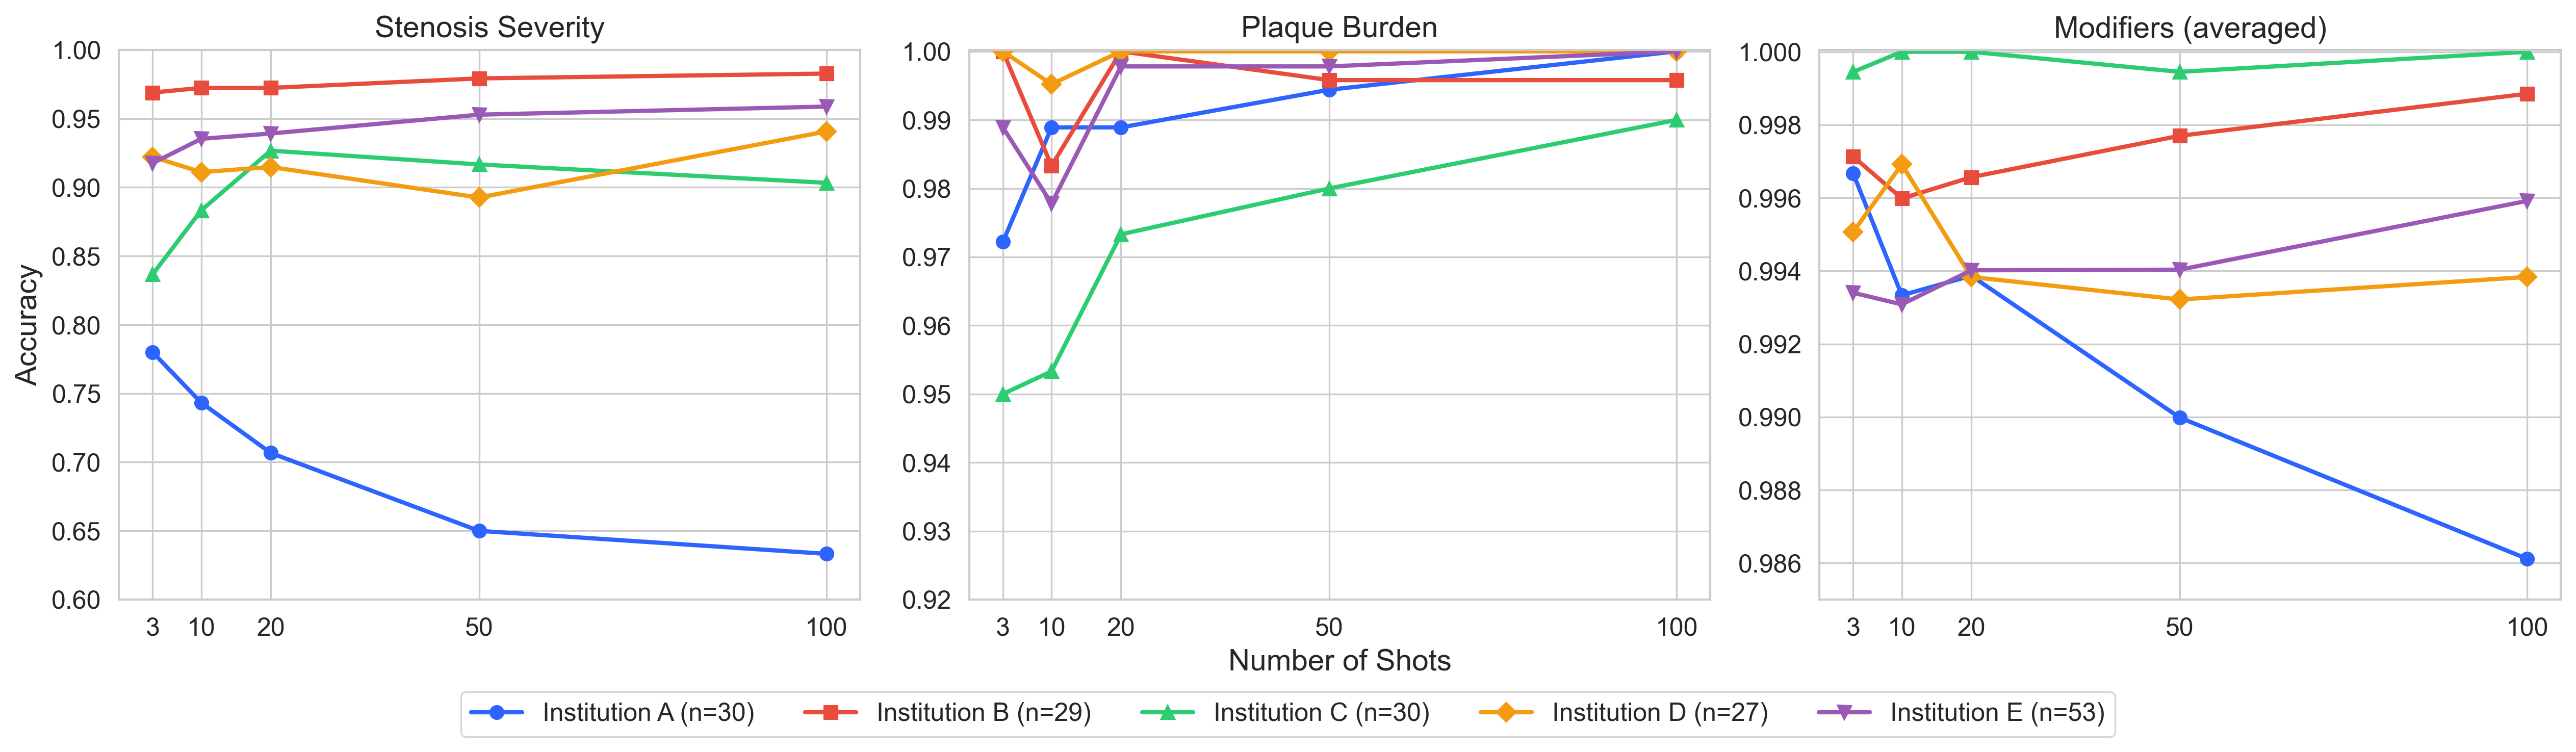

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Colors for each institution
institution_colors = {
    'A': '#2E64FE',  # Blue
    'B': '#E74C3C',  # Red
    'C': '#2ECC71',  # Green
    'D': '#F39C12',  # Orange
    'E': '#9B59B6'   # Purple
}

# Line styles for each institution
institution_markers = {
    'A': 'o',
    'B': 's',
    'C': '^',
    'D': 'D',
    'E': 'v'
}

def plot_institution_performance(ax, data, title, ylim, show_x_label=False, show_y_label=False):
    lines = []
    for inst in ['A', 'B', 'C', 'D', 'E']:
        means = data[f'{inst}_means']
        stds = data[f'{inst}_stds']
        
        line = ax.plot(n_shots, means, 
                      marker=institution_markers[inst],
                      color=institution_colors[inst],
                      linewidth=2, 
                      markersize=6,
                      label=f'Institution {inst}',
                      zorder=2)[0]
        
        lines.append(line)
    
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
        
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
        
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    return lines

# CAD-RADS (Stenosis) data
stenosis_data = {
    'A_means': np.array([0.7800, 0.7433, 0.7067, 0.6500, 0.6333]),
    'A_stds': np.array([0.0834, 0.0754, 0.0966, 0.0451, 0.0588]),
    'B_means': np.array([0.9690, 0.9724, 0.9724, 0.9793, 0.9828]),
    'B_stds': np.array([0.0196, 0.0218, 0.0272, 0.0178, 0.0182]),
    'C_means': np.array([0.8367, 0.8833, 0.9267, 0.9167, 0.9033]),
    'C_stds': np.array([0.0922, 0.0527, 0.0625, 0.0633, 0.0399]),
    'D_means': np.array([0.9222, 0.9111, 0.9148, 0.8926, 0.9407]),
    'D_stds': np.array([0.0443, 0.0259, 0.0392, 0.0368, 0.0398]),
    'E_means': np.array([0.9176, 0.9353, 0.9392, 0.9529, 0.9588]),
    'E_stds': np.array([0.0258, 0.0186, 0.0216, 0.0137, 0.0062])
}

# Plaque Burden data
plaque_data = {
    'A_means': np.array([0.9722, 0.9889, 0.9889, 0.9944, 1.0000]),
    'A_stds': np.array([0.0293, 0.0234, 0.0234, 0.0176, 0.0000]),
    'B_means': np.array([1.0000, 0.9833, 1.0000, 0.9958, 0.9958]),
    'B_stds': np.array([0.0000, 0.0215, 0.0000, 0.0132, 0.0132]),
    'C_means': np.array([0.9500, 0.9533, 0.9733, 0.9800, 0.9900]),
    'C_stds': np.array([0.0451, 0.0477, 0.0263, 0.0233, 0.0161]),
    'D_means': np.array([1.0000, 0.9952, 1.0000, 1.0000, 1.0000]),
    'D_stds': np.array([0.0000, 0.0151, 0.0000, 0.0000, 0.0000]),
    'E_means': np.array([0.9889, 0.9778, 0.9978, 0.9978, 1.0000]),
    'E_stds': np.array([0.0157, 0.0296, 0.0070, 0.0070, 0.0000])
}

# Modifiers data (average of I, G, N, HRP, E, S)
modifiers_data = {
    'A_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9833, 1.0000, 0.9967]),
        np.mean([1.0000, 1.0000, 0.9900, 0.9800, 0.9900, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9833, 0.9933, 0.9933, 0.9933]),
        np.mean([1.0000, 1.0000, 0.9633, 0.9933, 0.9833, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9300, 1.0000, 0.9867, 1.0000])
    ]),
    'A_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0176, 0.0000, 0.0105]),
        np.mean([0.0000, 0.0000, 0.0225, 0.0172, 0.0225, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0283, 0.0141, 0.0211, 0.0141]),
        np.mean([0.0000, 0.0000, 0.0292, 0.0141, 0.0236, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0246, 0.0000, 0.0172, 0.0000])
    ]),
    'B_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 0.9931, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 0.9966, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9862, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9931, 1.0000, 1.0000])
    ]),
    'B_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0182, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0244, 0.0218, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0182, 0.0109, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0178, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0145, 0.0000, 0.0000])
    ]),
    'C_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9967, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 0.9967, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
    ]),
    'C_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0105, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0105, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
    ]),
    'D_means': np.array([
        np.mean([1.0000, 1.0000, 0.9704, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9815, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9667, 0.9963, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9630, 0.9963, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9630, 1.0000, 1.0000, 1.0000])
    ]),
    'D_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0156, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0195, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0117, 0.0117, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0117, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
    ]),
    'E_means': np.array([
        np.mean([1.0000, 1.0000, 0.9736, 1.0000, 0.9868, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9736, 1.0000, 0.9849, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9792, 1.0000, 0.9849, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9774, 1.0000, 0.9868, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9774, 1.0000, 0.9981, 1.0000])
    ]),
    'E_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0097, 0.0000, 0.0091, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0097, 0.0000, 0.0080, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0107, 0.0000, 0.0080, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0119, 0.0000, 0.0091, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0080, 0.0000, 0.0060, 0.0000])
    ])
}

# Plot each subplot
# ax1.set_ylabel('Accuracy')
lines1 = plot_institution_performance(ax1, stenosis_data, 'Stenosis Severity', [0.6, 1.0], 
                                   show_y_label=True)  # 첫 번째 subplot에 y축 레이블
lines2 = plot_institution_performance(ax2, plaque_data, 'Plaque Burden', [0.92, 1.0002], 
                                   show_x_label=True)  # 두 번째 subplot에 x축 레이블
lines3 = plot_institution_performance(ax3, modifiers_data, 'Modifiers (averaged)', [0.9850, 1.00005])


# Add legend at the bottom
labels = [f'Institution {inst}' for inst in ['A (n=30)', 'B (n=29)', 'C (n=30)', 'D (n=27)', 'E (n=53)']]
fig.legend(lines1, labels,
          loc='center',
          bbox_to_anchor=(0.5, 0.05),
          ncol=5,
          frameon=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_582516\447352028.py:54: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(data=df, x='Metric', y='Accuracy',


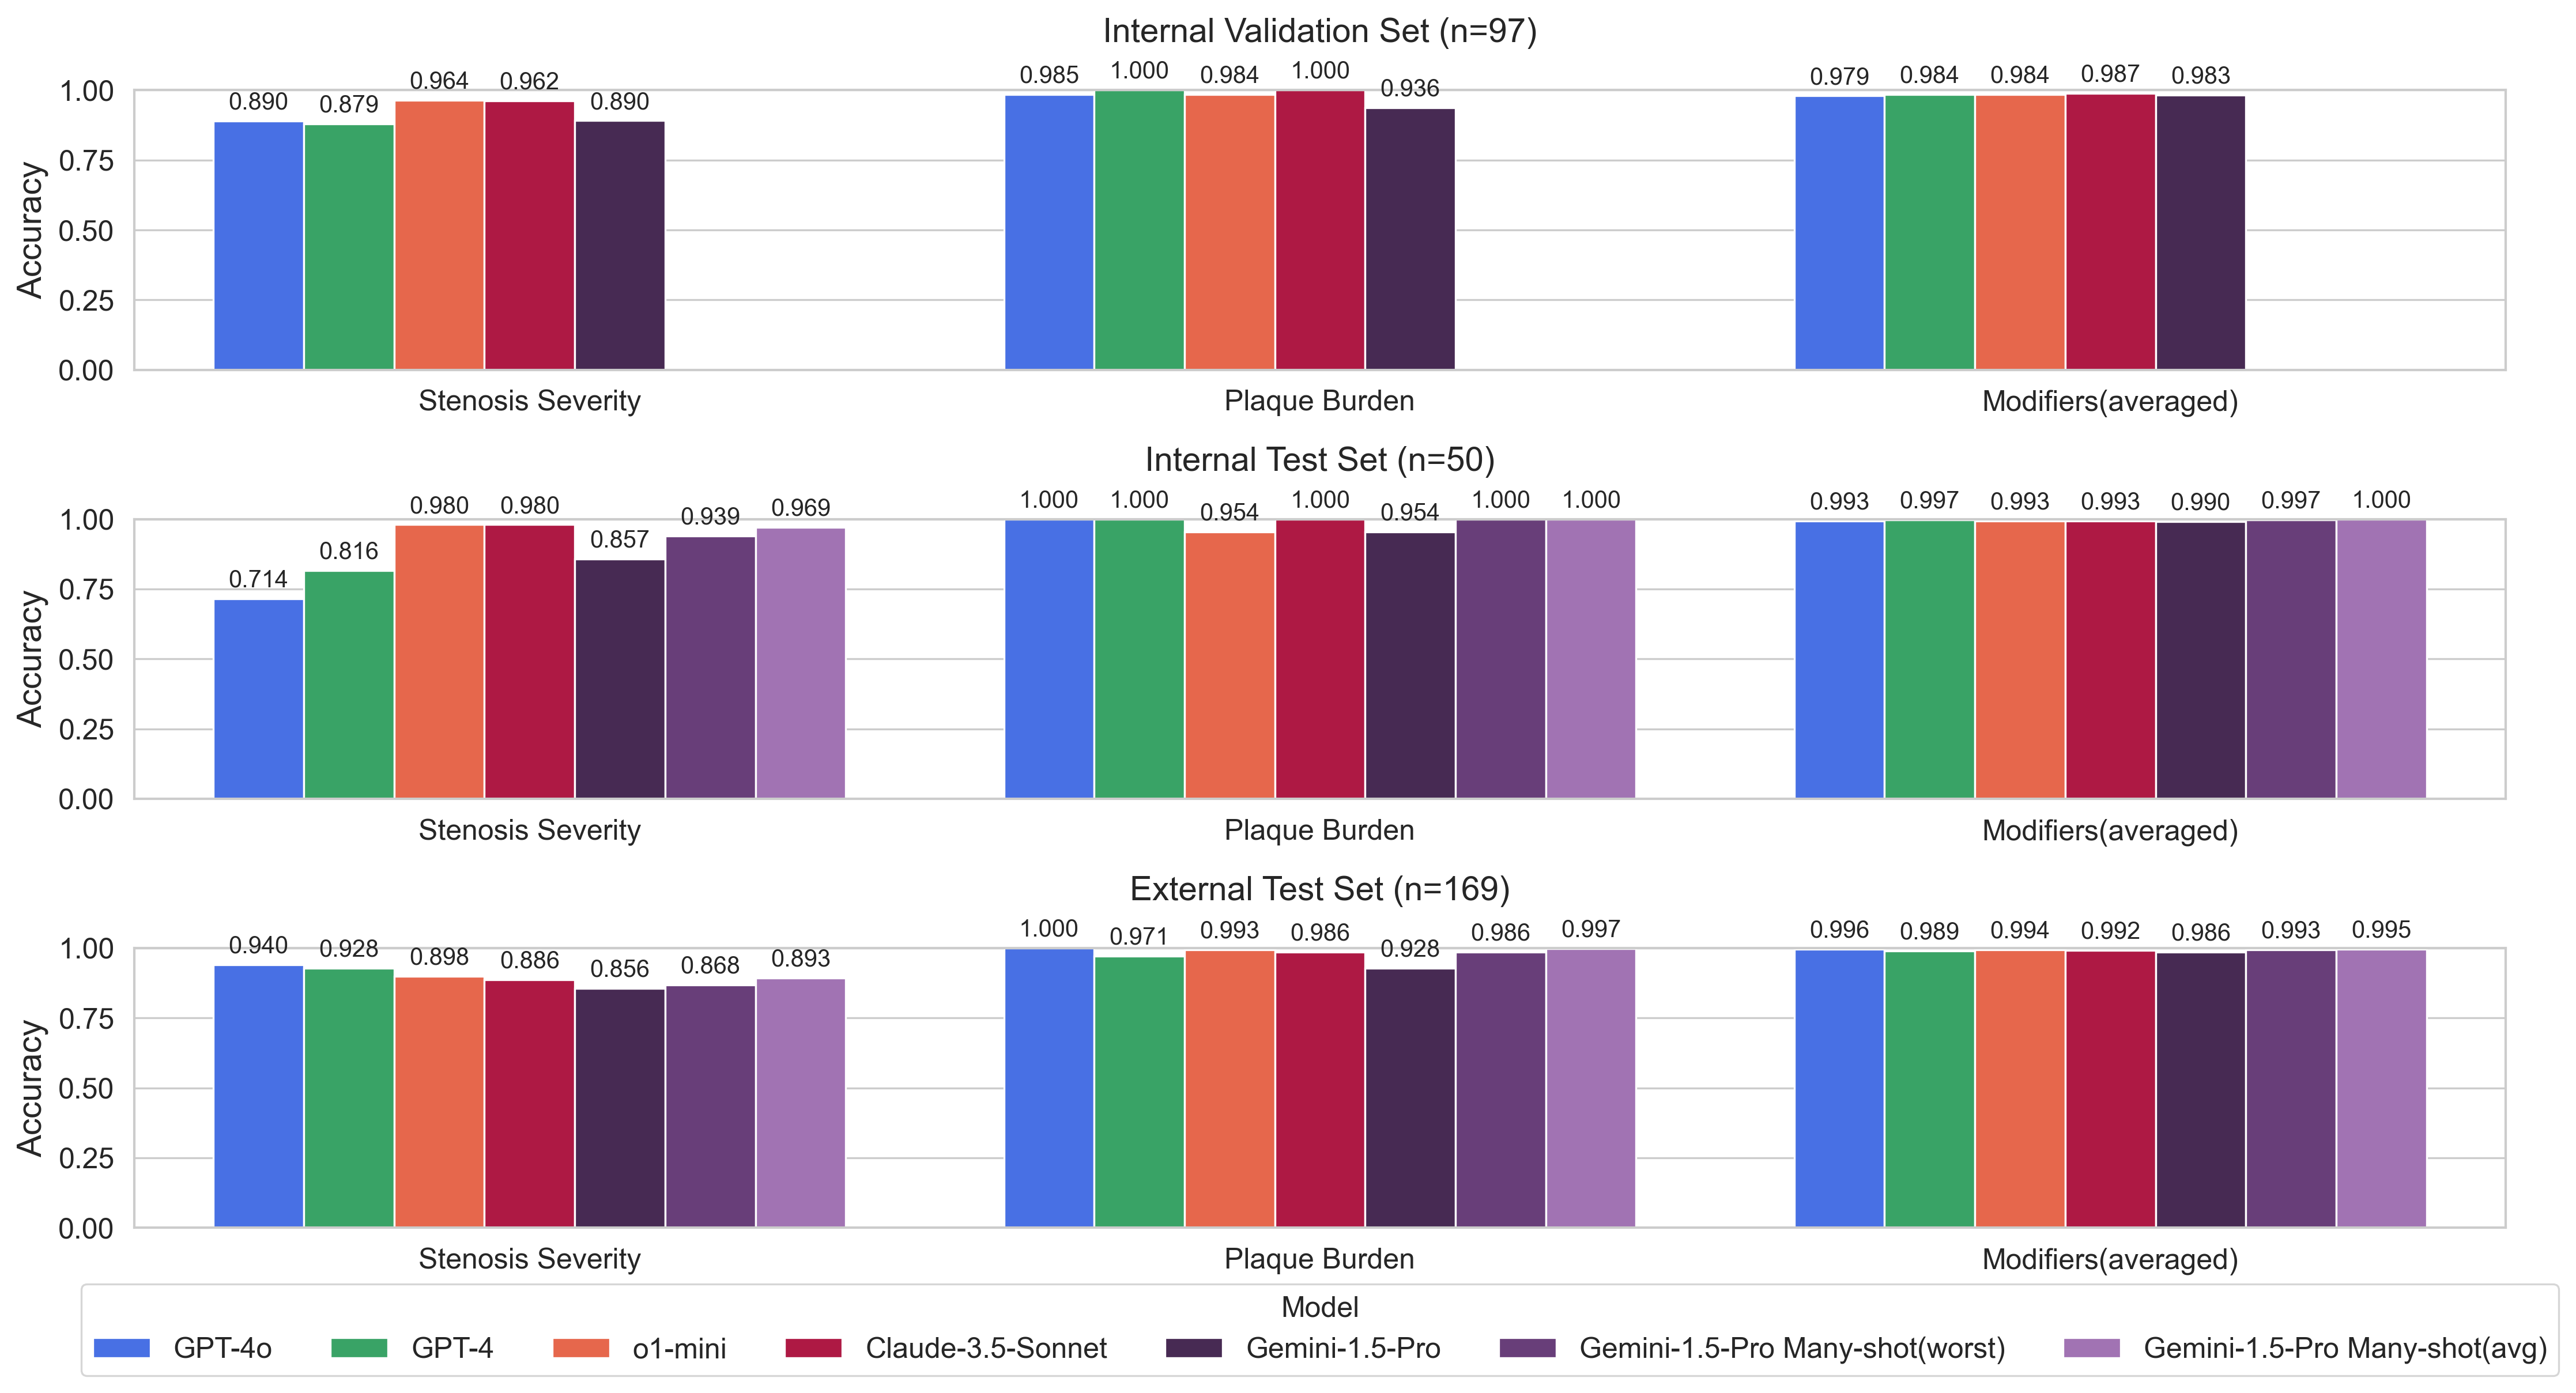

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_dataset_f1_scores(data_list, titles):
    """
    세 데이터셋의 accuracy 점수를 서브플롯으로 표시
    
    Args:
        data_list: List of dictionaries containing the data for each plot
        titles: List of titles for each subplot
    """
    # Style settings
    sns.set_style("whitegrid")
    sns.set_context("paper")
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'legend.title_fontsize': 12,
    })

    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(16, 9), dpi=300)
    
    # Color palette - 마지막 세 색상을 보라색 계열로 설정 (진한색 -> 옅은색)
    colors = ['#2E64FE', '#28B463', '#FF5733', '#C70039', '#4A235A', '#6C3483', '#A569BD']

    # Create each subplot
    for idx, (data, title) in enumerate(zip(data_list, titles)):
        # Convert dictionary to DataFrame and reorder the models
        df = pd.DataFrame(data)
        
        # Define the desired order for the models
        model_order = ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 
                      'Gemini-1.5-Pro', 'Gemini-1.5-Pro Many-shot(worst)', 
                      'Gemini-1.5-Pro Many-shot(avg)']
        
        # Create categorical types with the desired order for both Model and Metric
        df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
        metric_order = ['Stenosis Severity', 'Plaque Burden', 'Modifiers(averaged)']
        df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
        
        # Sort the DataFrame
        df = df.sort_values(['Metric', 'Model'], ascending=[True, True])
        
        ax = axes[idx]
        
        # Plot Accuracy
        bars = sns.barplot(data=df, x='Metric', y='Accuracy', 
                          hue='Model', palette=colors[:len(df['Model'].unique())], 
                          ax=ax)

        # Add value labels on the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

        # Customize axes
        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlabel('')
        ax.set_title(title, pad=20)

        # Only show legend for the last subplot
        if idx < len(data_list) - 1:
            ax.get_legend().remove()
        else:
            ax.legend(loc='upper center', 
                     bbox_to_anchor=(0.5, -0.15),
                     ncol=len(df['Model'].unique()), title='Model')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.0, w_pad=0.1)
    plt.show()

# 데이터 준비
data_validation = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro'] * 3,
    'Metric': ['Stenosis Severity'] * 5 + ['Plaque Burden'] * 5 + ['Modifiers(averaged)'] * 5,
    'Accuracy': [0.8902, 0.8794, 0.9640, 0.9617, 0.8903,
                 0.9846, 1.0000, 0.9843, 1.0000, 0.9359,
                 0.9790, 0.9835, 0.9838, 0.9873, 0.9826]
}

data_test = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 
              'Gemini-1.5-Pro', 'Gemini-1.5-Pro Many-shot(worst)', 'Gemini-1.5-Pro Many-shot(avg)'] * 3,
    'Metric': ['Stenosis Severity'] * 7 + ['Plaque Burden'] * 7 + ['Modifiers(averaged)'] * 7,
    'Accuracy': [0.7143, 0.8163, 0.9796, 0.9796, 0.8571, 0.939, 0.9694,
                 1.0000, 1.0000, 0.9535, 1.0000, 0.9535, 1.0000, 1.0000,
                 0.9933, 0.9967, 0.9933, 0.9933, 0.9900, 0.9970, 0.9997]
}

data_external = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 
              'Gemini-1.5-Pro', 'Gemini-1.5-Pro Many-shot(worst)', 'Gemini-1.5-Pro Many-shot(avg)'] * 3,
    'Metric': ['Stenosis Severity'] * 7 + ['Plaque Burden'] * 7 + ['Modifiers(averaged)'] * 7,
    'Accuracy': [0.9401, 0.9281, 0.8982, 0.8862, 0.8563, 0.8683, 0.8934,
                 1.0000, 0.9710, 0.9928, 0.986, 0.928, 0.986, 0.9971,
                 0.9961, 0.9892, 0.9941, 0.9921, 0.9862, 0.9931, 0.9951]
}

# 서브플롯 생성
plot_combined_dataset_f1_scores(
    [data_validation, data_test, data_external],
    ['Internal Validation Set (n=97)',
     'Internal Test Set (n=50)',
     'External Test Set (n=169)']
)

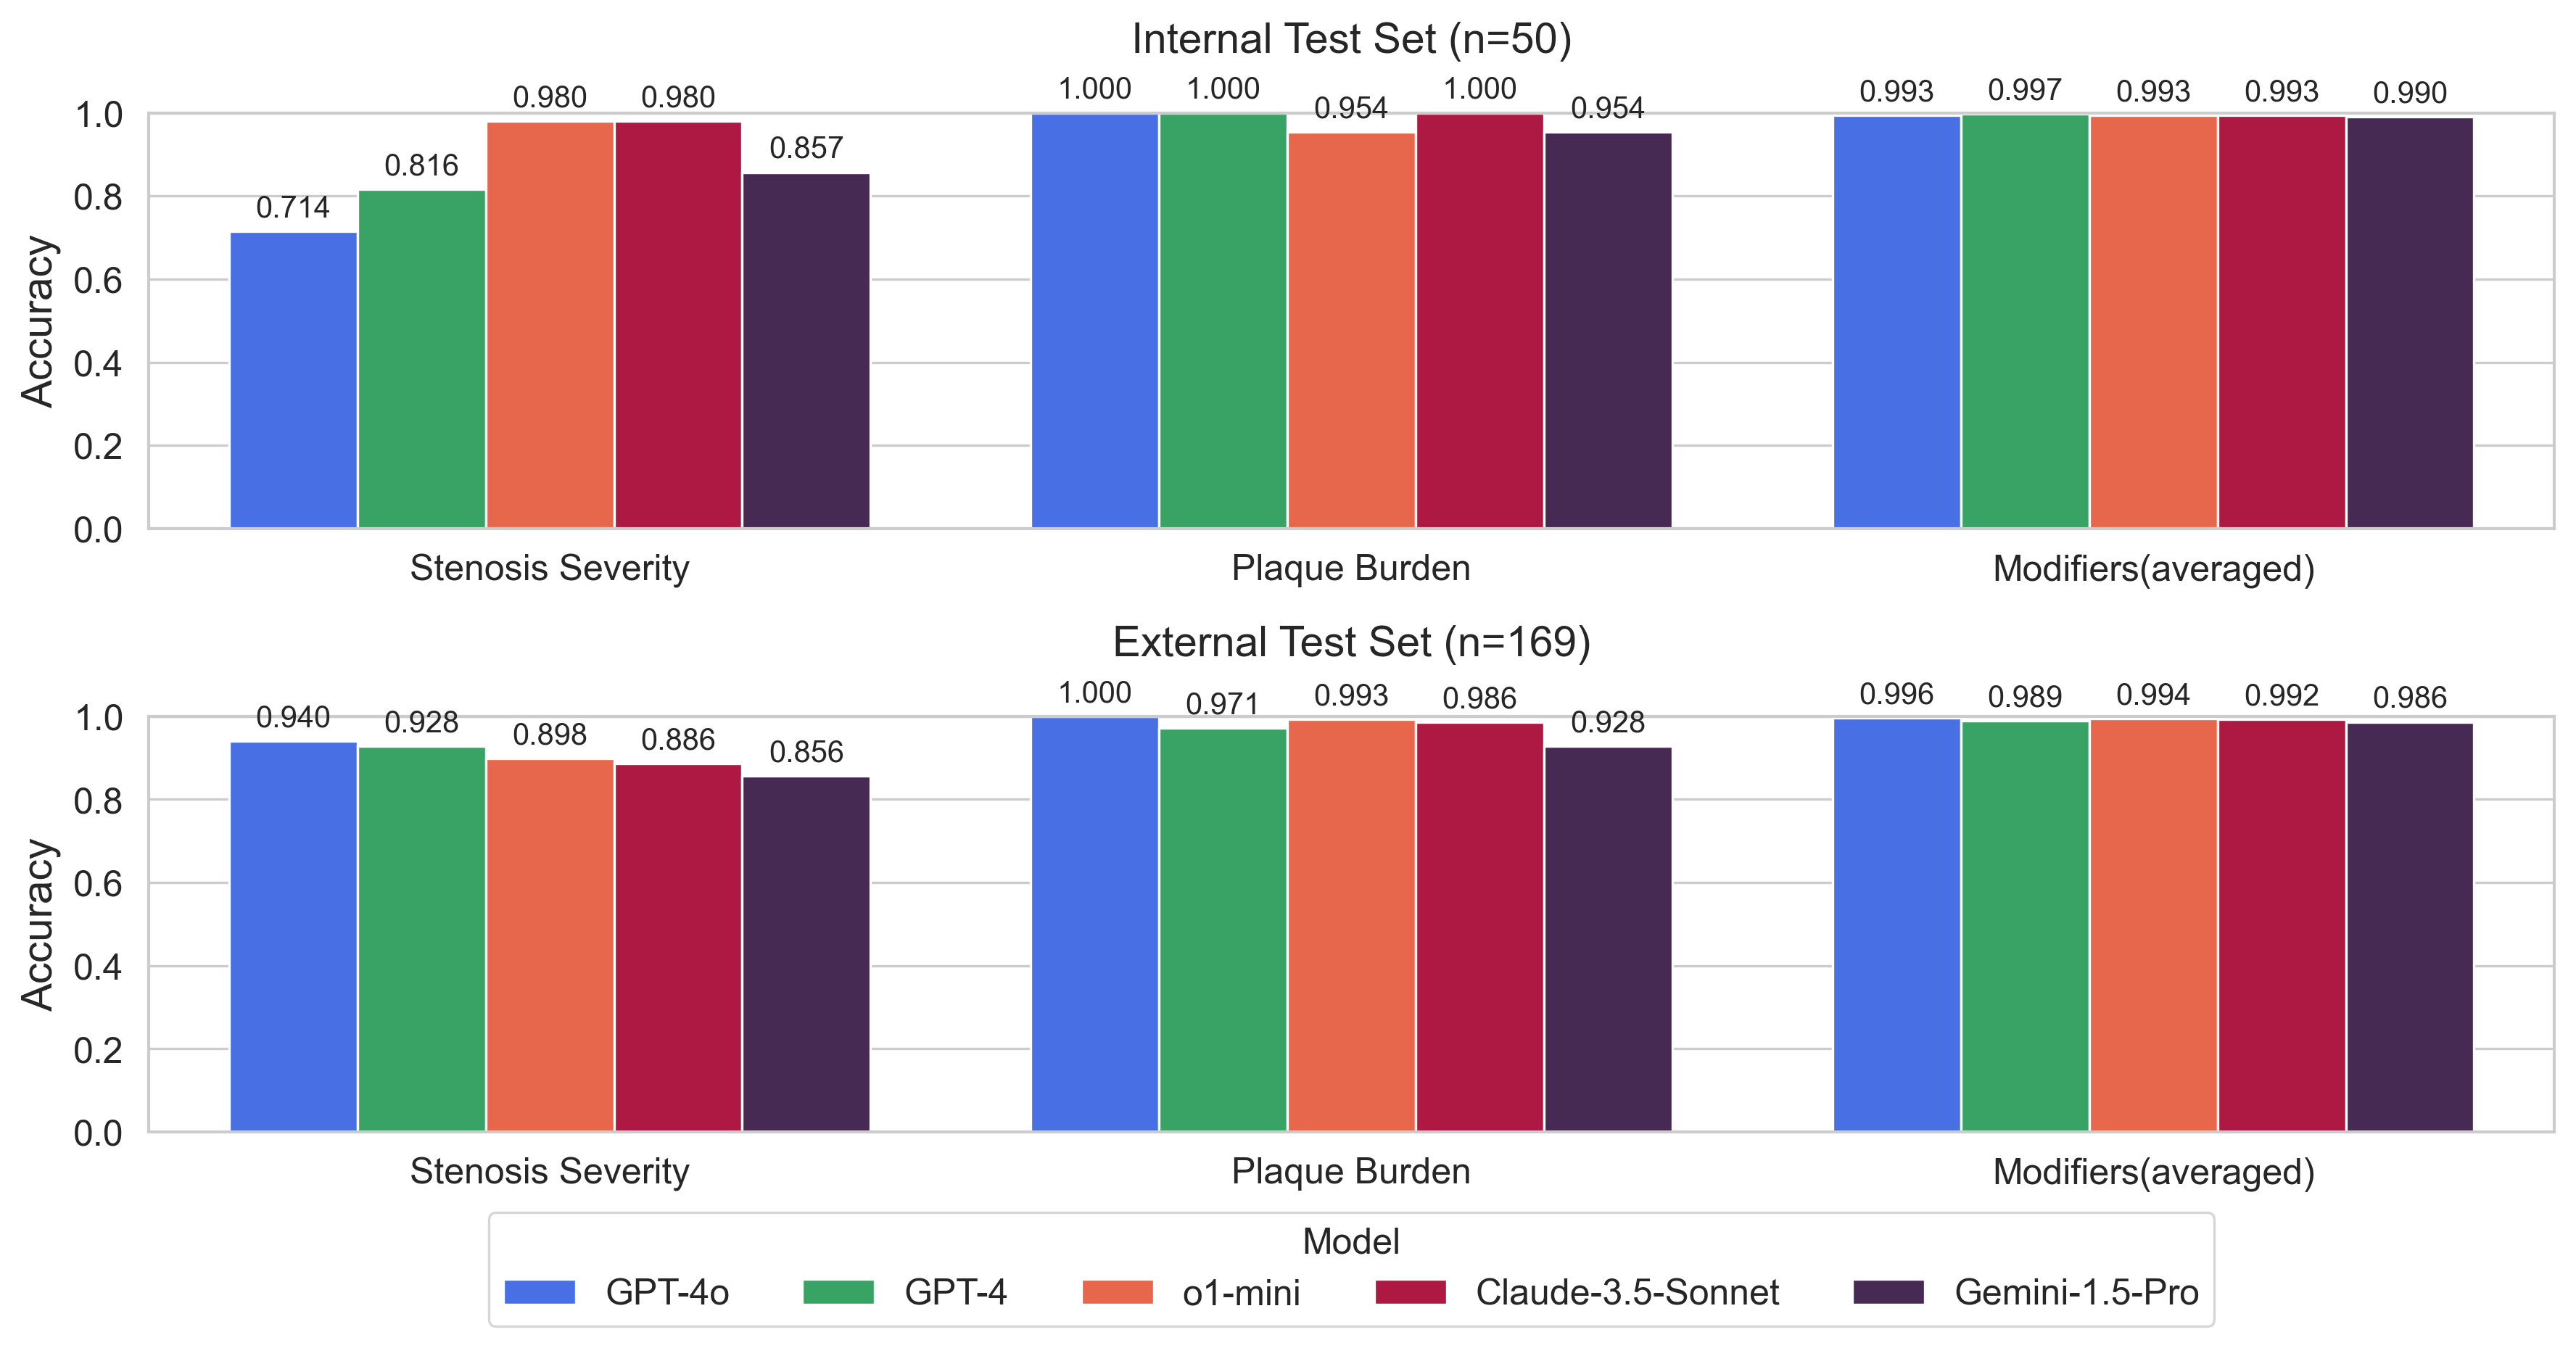

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_dataset_f1_scores(data_list, titles):
    """
    두 데이터셋의 accuracy 점수를 서브플롯으로 표시
    
    Args:
        data_list: List of dictionaries containing the data for each plot
        titles: List of titles for each subplot
    """
    # Style settings
    sns.set_style("whitegrid")
    sns.set_context("paper")
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'legend.title_fontsize': 12,
    })

    # Create figure with subplots - changed from 3 to 2 subplots
    fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=300)
    
    # Color palette - 기본 5개 색상만 사용
    colors = ['#2E64FE', '#28B463', '#FF5733', '#C70039', '#4A235A']

    # Create each subplot
    for idx, (data, title) in enumerate(zip(data_list, titles)):
        # Convert dictionary to DataFrame and reorder the models
        df = pd.DataFrame(data)
        
        # Define the desired order for the models - removed many-shot models
        model_order = ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro']
        
        # Create categorical types with the desired order for both Model and Metric
        df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
        metric_order = ['Stenosis Severity', 'Plaque Burden', 'Modifiers(averaged)']
        df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
        
        # Sort the DataFrame
        df = df.sort_values(['Metric', 'Model'], ascending=[True, True])
        
        ax = axes[idx]
        
        # Plot Accuracy
        bars = sns.barplot(data=df, x='Metric', y='Accuracy', 
                          hue='Model', palette=colors[:len(df['Model'].unique())], 
                          ax=ax)

        # Add value labels on the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

        # Customize axes
        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlabel('')
        ax.set_title(title, pad=20)

        # Only show legend for the last subplot
        if idx < len(data_list) - 1:
            ax.get_legend().remove()
        else:
            ax.legend(loc='upper center', 
                     bbox_to_anchor=(0.5, -0.15),
                     ncol=len(df['Model'].unique()), title='Model')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.0, w_pad=0.1)
    plt.show()

# 데이터 준비 - removed validation data and many-shot models
data_test = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro'] * 3,
    'Metric': ['Stenosis Severity'] * 5 + ['Plaque Burden'] * 5 + ['Modifiers(averaged)'] * 5,
    'Accuracy': [0.7143, 0.8163, 0.9796, 0.9796, 0.8571,
                 1.0000, 1.0000, 0.9535, 1.0000, 0.9535,
                 0.9933, 0.9967, 0.9933, 0.9933, 0.9900]
}

data_external = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro'] * 3,
    'Metric': ['Stenosis Severity'] * 5 + ['Plaque Burden'] * 5 + ['Modifiers(averaged)'] * 5,
    'Accuracy': [0.9401, 0.9281, 0.8982, 0.8862, 0.8563,
                 1.0000, 0.9710, 0.9928, 0.986, 0.928,
                 0.9961, 0.9892, 0.9941, 0.9921, 0.9862]
}

# 서브플롯 생성 - removed validation plot
plot_combined_dataset_f1_scores(
    [data_test, data_external],
    ['Internal Test Set (n=50)',
     'External Test Set (n=169)']
)

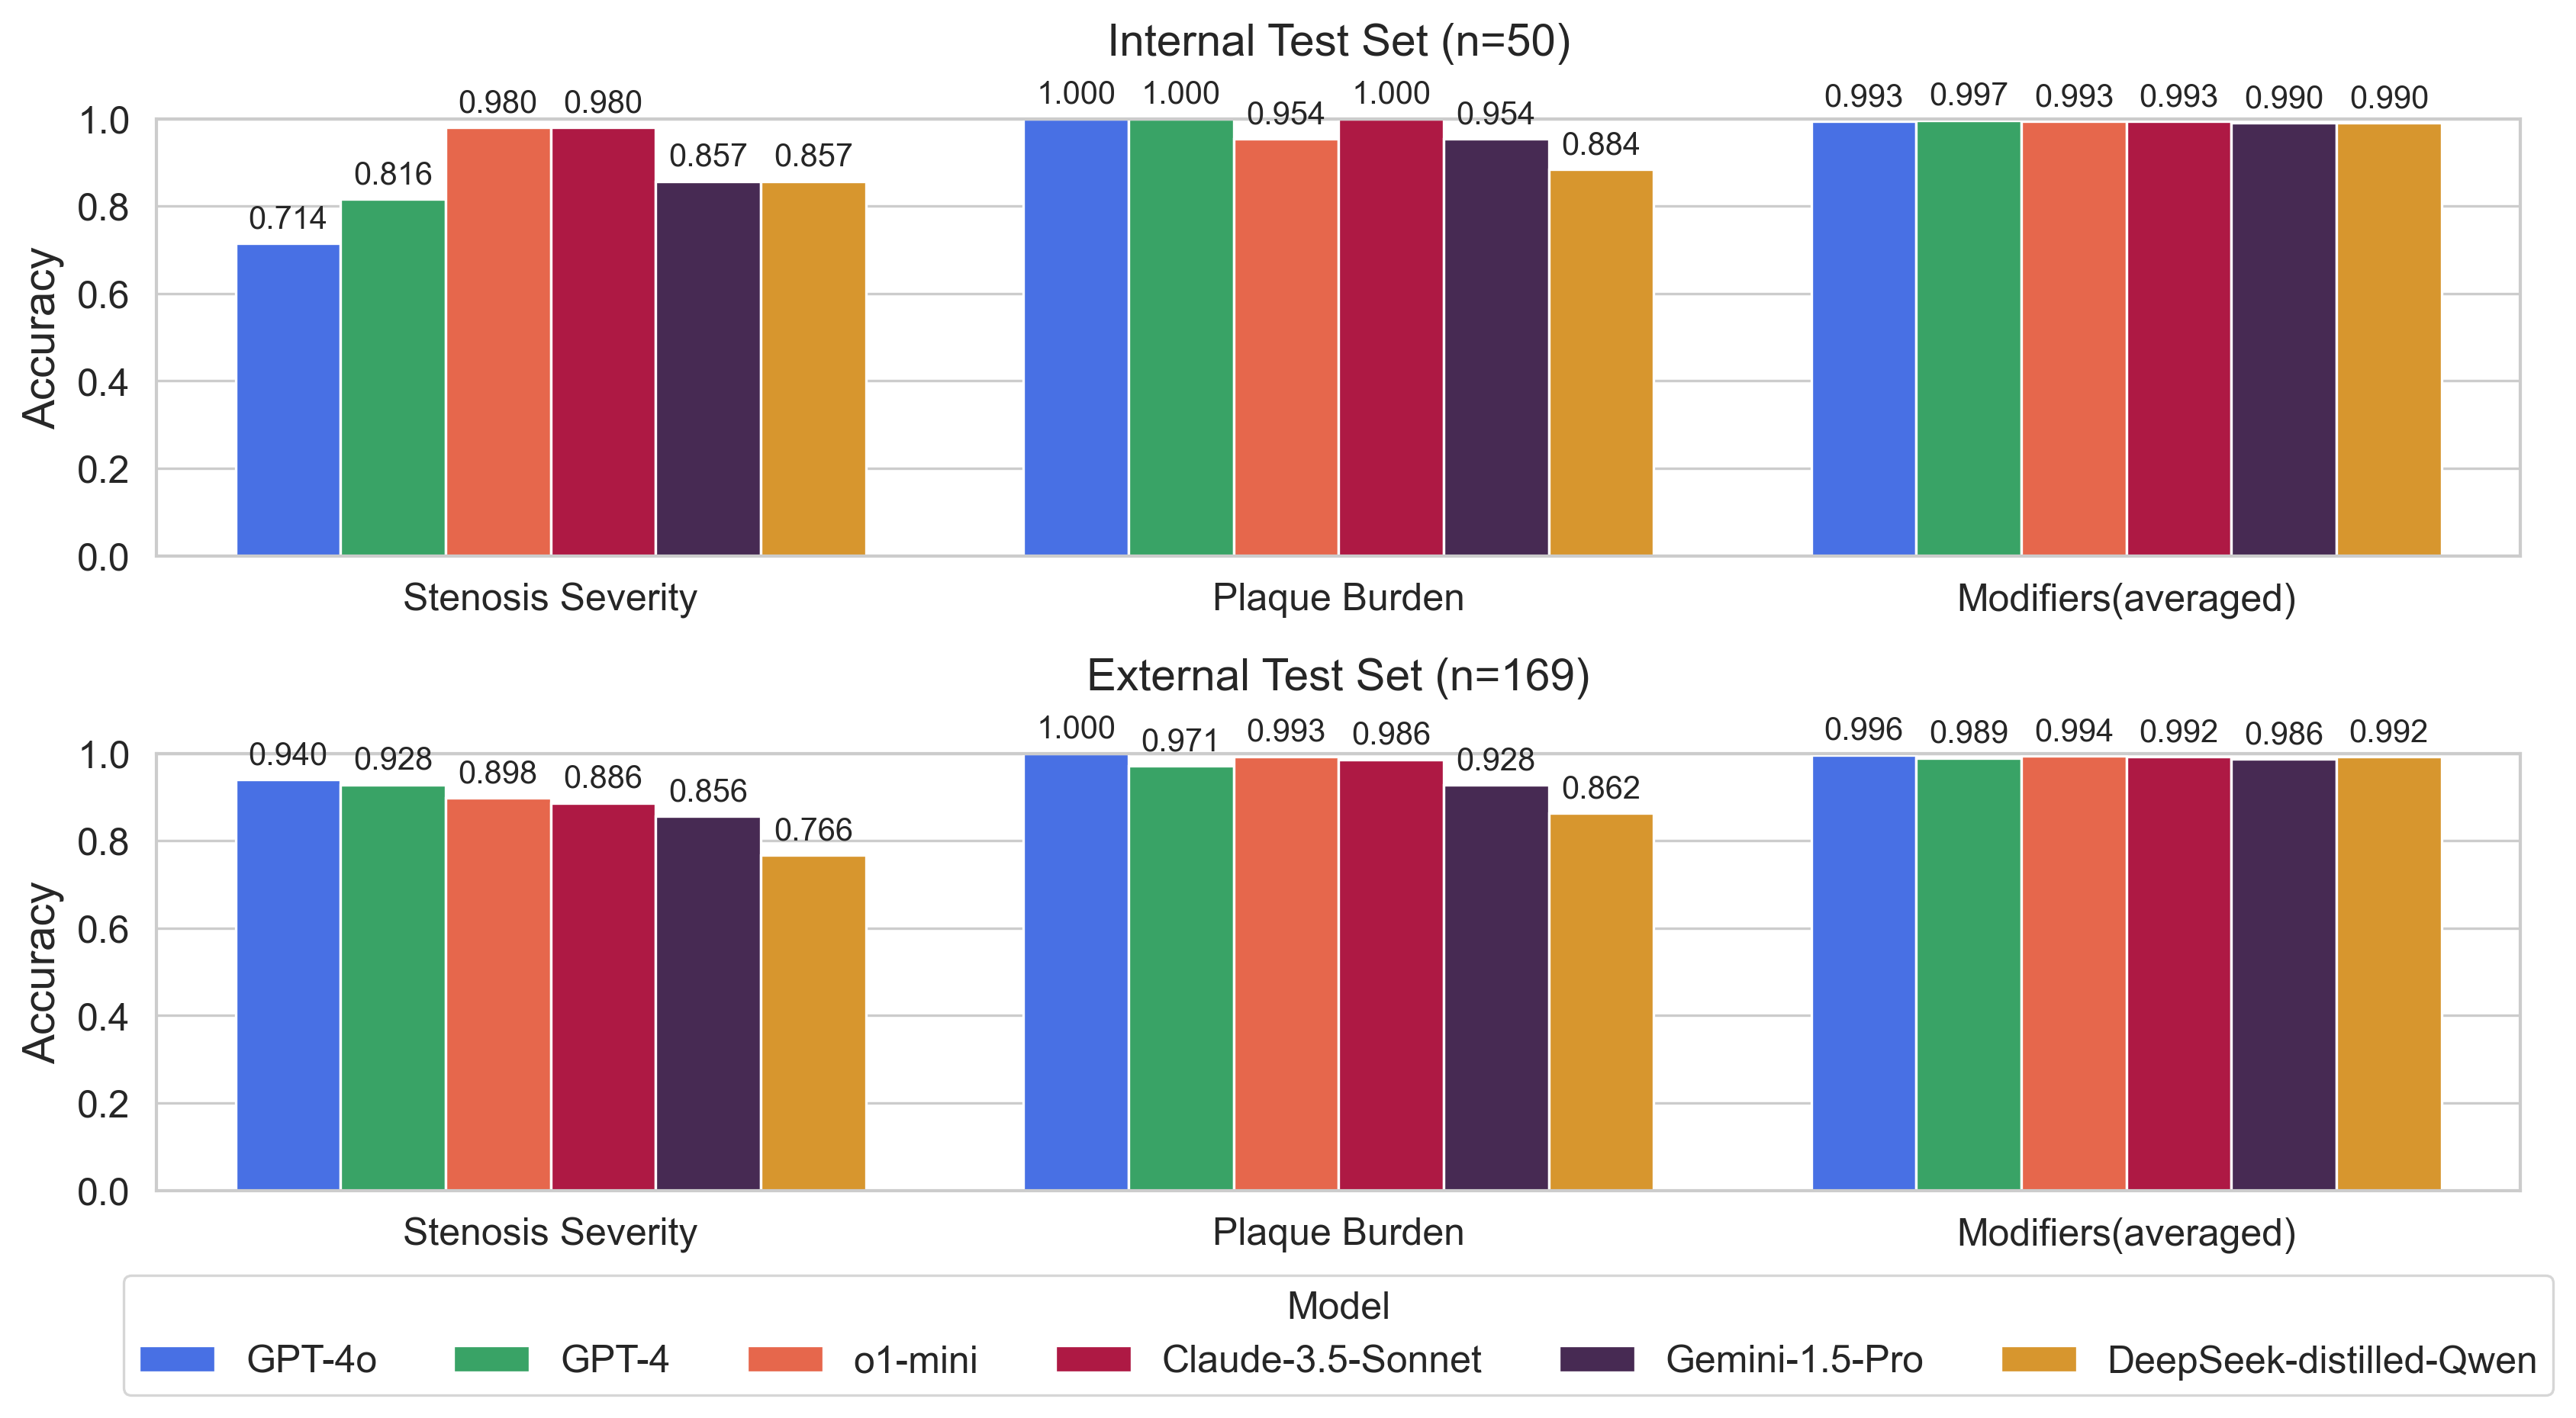

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_dataset_f1_scores(data_list, titles):
    """
    두 데이터셋의 accuracy 점수를 서브플롯으로 표시
    
    Args:
        data_list: List of dictionaries containing the data for each plot
        titles: List of titles for each subplot
    """
    # Style settings remain the same
    sns.set_style("whitegrid")
    sns.set_context("paper")
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'legend.title_fontsize': 12,
    })

    fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=300)
    
    # Updated color palette with one more color
    colors = ['#2E64FE', '#28B463', '#FF5733', '#C70039', '#4A235A', '#F39C12']

    for idx, (data, title) in enumerate(zip(data_list, titles)):
        df = pd.DataFrame(data)
        
        # Updated model order with new model
        model_order = ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro', 'DeepSeek-distilled-Qwen']
        
        df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
        metric_order = ['Stenosis Severity', 'Plaque Burden', 'Modifiers(averaged)']
        df['Metric'] = pd.Categorical(df['Metric'], categories=metric_order, ordered=True)
        
        df = df.sort_values(['Metric', 'Model'], ascending=[True, True])
        
        ax = axes[idx]
        
        bars = sns.barplot(data=df, x='Metric', y='Accuracy', 
                          hue='Model', palette=colors[:len(df['Model'].unique())], 
                          ax=ax)

        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlabel('')
        ax.set_title(title, pad=20)

        if idx < len(data_list) - 1:
            ax.get_legend().remove()
        else:
            ax.legend(loc='upper center', 
                     bbox_to_anchor=(0.5, -0.15),
                     ncol=len(df['Model'].unique()), title='Model')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.0, w_pad=0.1)
    plt.show()

# Updated data dictionaries with new model
data_test = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro', 'DeepSeek-distilled-Qwen'] * 3,
    'Metric': ['Stenosis Severity'] * 6 + ['Plaque Burden'] * 6 + ['Modifiers(averaged)'] * 6,
    'Accuracy': [0.7143, 0.8163, 0.9796, 0.9796, 0.8571, 0.8571,
                 1.0000, 1.0000, 0.9535, 1.0000, 0.9535, 0.8837,
                 0.9933, 0.9967, 0.9933, 0.9933, 0.9900, 0.9900]
}

data_external = {
    'Model': ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro', 'DeepSeek-distilled-Qwen'] * 3,
    'Metric': ['Stenosis Severity'] * 6 + ['Plaque Burden'] * 6 + ['Modifiers(averaged)'] * 6,
    'Accuracy': [0.9401, 0.9281, 0.8982, 0.8862, 0.8563, 0.7665,
                 1.0000, 0.9710, 0.9928, 0.986, 0.928, 0.8623,
                 0.9961, 0.9892, 0.9941, 0.9921, 0.9862, 0.9921]
}

plot_combined_dataset_f1_scores(
    [data_test, data_external],
    ['Internal Test Set (n=50)',
     'External Test Set (n=169)']
)

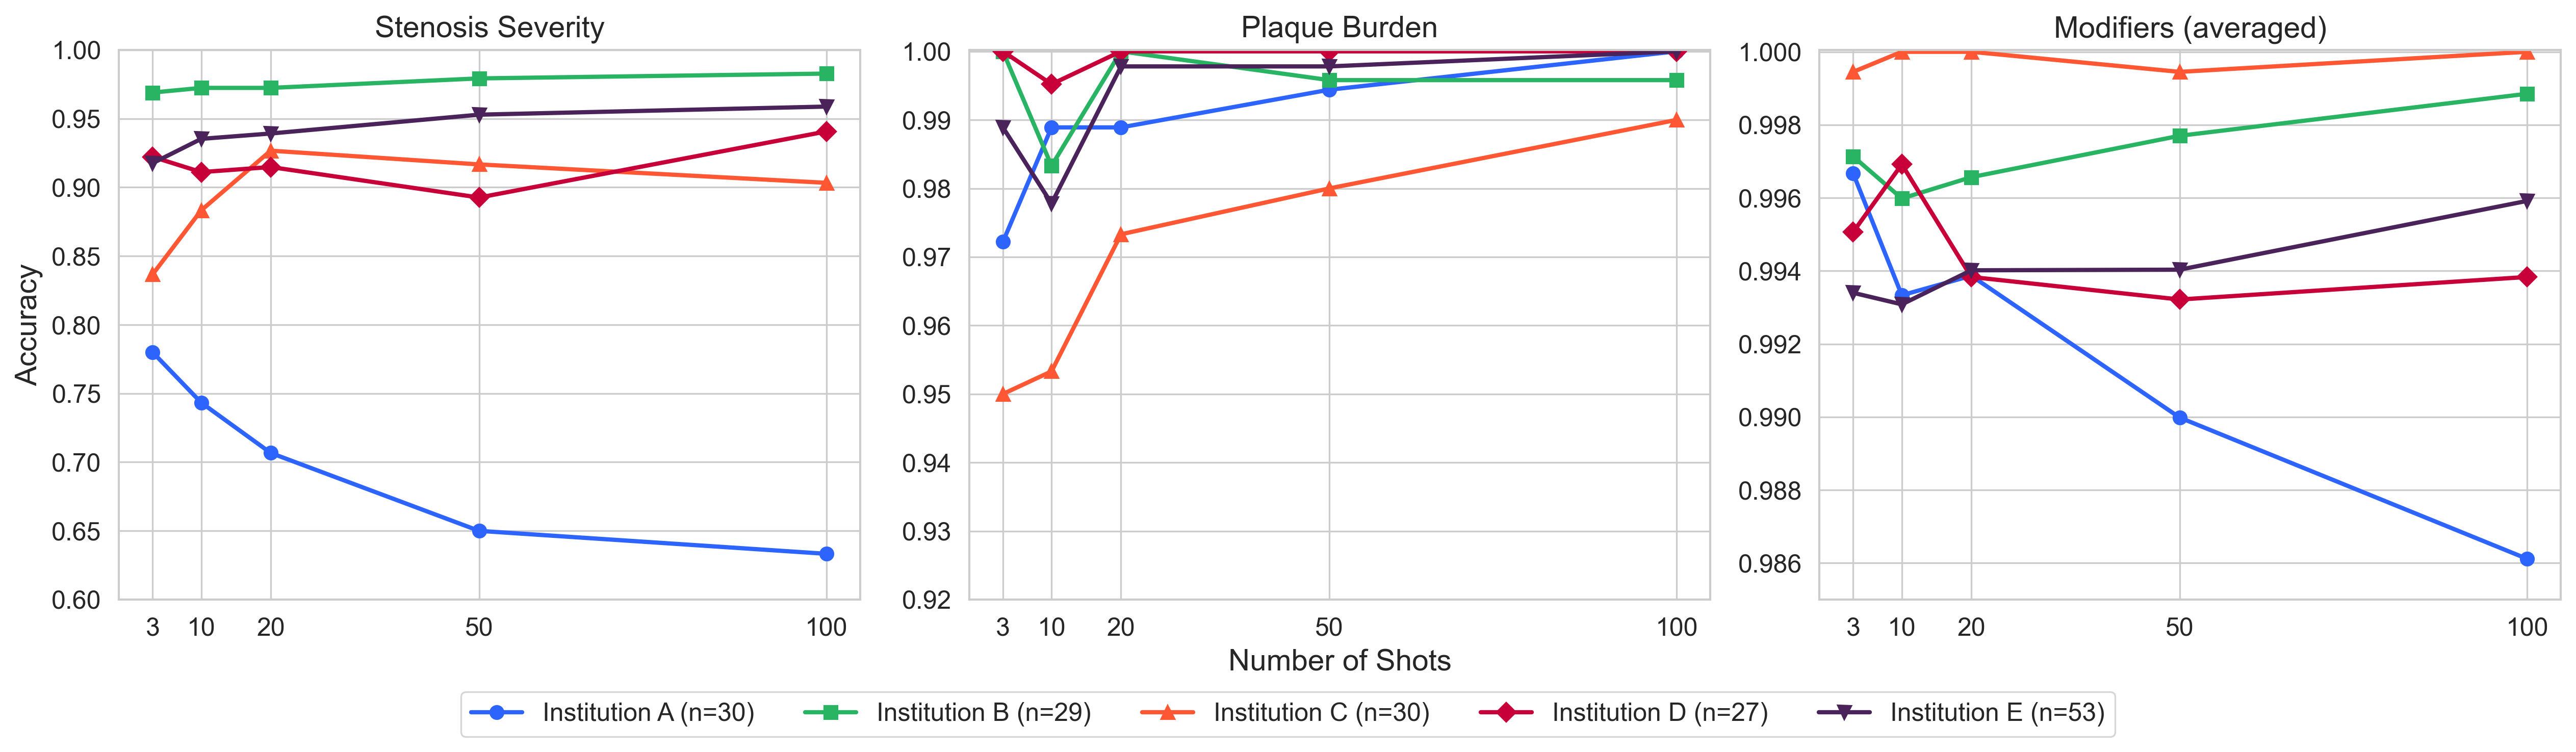

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 12
})

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), dpi=300)

# Data for all plots
n_shots = np.array([3, 10, 20, 50, 100])

# Colors for each institution
institution_colors = {
    'A': '#2E64FE',  # Blue
    'B': '#28B463',  # Red
    'C': '#FF5733',  # Green
    'D': '#C70039',  # Orange
    'E': '#4A235A'   # Purple
}

# Line styles for each institution
institution_markers = {
    'A': 'o',
    'B': 's',
    'C': '^',
    'D': 'D',
    'E': 'v'
}

def plot_institution_performance(ax, data, title, ylim, show_x_label=False, show_y_label=False):
    lines = []
    for inst in ['A', 'B', 'C', 'D', 'E']:
        means = data[f'{inst}_means']
        stds = data[f'{inst}_stds']
        
        line = ax.plot(n_shots, means, 
                      marker=institution_markers[inst],
                      color=institution_colors[inst],
                      linewidth=2, 
                      markersize=6,
                      label=f'Institution {inst}',
                      zorder=2)[0]
        
        lines.append(line)
    
    if show_x_label:
        ax.set_xlabel('Number of Shots')
    else:
        ax.set_xlabel('')
        
    if show_y_label:
        ax.set_ylabel('Accuracy')
    else:
        ax.set_ylabel('')
        
    ax.set_title(title)
    ax.set_xticks(n_shots)
    ax.set_ylim(ylim)
    return lines

# CAD-RADS (Stenosis) data
stenosis_data = {
    'A_means': np.array([0.7800, 0.7433, 0.7067, 0.6500, 0.6333]),
    'A_stds': np.array([0.0834, 0.0754, 0.0966, 0.0451, 0.0588]),
    'B_means': np.array([0.9690, 0.9724, 0.9724, 0.9793, 0.9828]),
    'B_stds': np.array([0.0196, 0.0218, 0.0272, 0.0178, 0.0182]),
    'C_means': np.array([0.8367, 0.8833, 0.9267, 0.9167, 0.9033]),
    'C_stds': np.array([0.0922, 0.0527, 0.0625, 0.0633, 0.0399]),
    'D_means': np.array([0.9222, 0.9111, 0.9148, 0.8926, 0.9407]),
    'D_stds': np.array([0.0443, 0.0259, 0.0392, 0.0368, 0.0398]),
    'E_means': np.array([0.9176, 0.9353, 0.9392, 0.9529, 0.9588]),
    'E_stds': np.array([0.0258, 0.0186, 0.0216, 0.0137, 0.0062])
}

# Plaque Burden data
plaque_data = {
    'A_means': np.array([0.9722, 0.9889, 0.9889, 0.9944, 1.0000]),
    'A_stds': np.array([0.0293, 0.0234, 0.0234, 0.0176, 0.0000]),
    'B_means': np.array([1.0000, 0.9833, 1.0000, 0.9958, 0.9958]),
    'B_stds': np.array([0.0000, 0.0215, 0.0000, 0.0132, 0.0132]),
    'C_means': np.array([0.9500, 0.9533, 0.9733, 0.9800, 0.9900]),
    'C_stds': np.array([0.0451, 0.0477, 0.0263, 0.0233, 0.0161]),
    'D_means': np.array([1.0000, 0.9952, 1.0000, 1.0000, 1.0000]),
    'D_stds': np.array([0.0000, 0.0151, 0.0000, 0.0000, 0.0000]),
    'E_means': np.array([0.9889, 0.9778, 0.9978, 0.9978, 1.0000]),
    'E_stds': np.array([0.0157, 0.0296, 0.0070, 0.0070, 0.0000])
}

# Modifiers data (average of I, G, N, HRP, E, S)
modifiers_data = {
    'A_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9833, 1.0000, 0.9967]),
        np.mean([1.0000, 1.0000, 0.9900, 0.9800, 0.9900, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9833, 0.9933, 0.9933, 0.9933]),
        np.mean([1.0000, 1.0000, 0.9633, 0.9933, 0.9833, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9300, 1.0000, 0.9867, 1.0000])
    ]),
    'A_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0176, 0.0000, 0.0105]),
        np.mean([0.0000, 0.0000, 0.0225, 0.0172, 0.0225, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0283, 0.0141, 0.0211, 0.0141]),
        np.mean([0.0000, 0.0000, 0.0292, 0.0141, 0.0236, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0246, 0.0000, 0.0172, 0.0000])
    ]),
    'B_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 0.9931, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9828, 0.9966, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9862, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 0.9931, 1.0000, 1.0000])
    ]),
    'B_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0182, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0244, 0.0218, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0182, 0.0109, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0178, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0145, 0.0000, 0.0000])
    ]),
    'C_means': np.array([
        np.mean([1.0000, 1.0000, 1.0000, 0.9967, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 0.9967, 1.0000]),
        np.mean([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
    ]),
    'C_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0000, 0.0105, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0105, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
    ]),
    'D_means': np.array([
        np.mean([1.0000, 1.0000, 0.9704, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9815, 1.0000, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9667, 0.9963, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9630, 0.9963, 1.0000, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9630, 1.0000, 1.0000, 1.0000])
    ]),
    'D_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0156, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0195, 0.0000, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0117, 0.0117, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0117, 0.0000, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
    ]),
    'E_means': np.array([
        np.mean([1.0000, 1.0000, 0.9736, 1.0000, 0.9868, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9736, 1.0000, 0.9849, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9792, 1.0000, 0.9849, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9774, 1.0000, 0.9868, 1.0000]),
        np.mean([1.0000, 1.0000, 0.9774, 1.0000, 0.9981, 1.0000])
    ]),
    'E_stds': np.array([
        np.mean([0.0000, 0.0000, 0.0097, 0.0000, 0.0091, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0097, 0.0000, 0.0080, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0107, 0.0000, 0.0080, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0119, 0.0000, 0.0091, 0.0000]),
        np.mean([0.0000, 0.0000, 0.0080, 0.0000, 0.0060, 0.0000])
    ])
}

# Plot each subplot
# ax1.set_ylabel('Accuracy')
lines1 = plot_institution_performance(ax1, stenosis_data, 'Stenosis Severity', [0.6, 1.0], 
                                   show_y_label=True)  # 첫 번째 subplot에 y축 레이블
lines2 = plot_institution_performance(ax2, plaque_data, 'Plaque Burden', [0.92, 1.0002], 
                                   show_x_label=True)  # 두 번째 subplot에 x축 레이블
lines3 = plot_institution_performance(ax3, modifiers_data, 'Modifiers (averaged)', [0.9850, 1.00005])


# Add legend at the bottom
labels = [f'Institution {inst}' for inst in ['A (n=30)', 'B (n=29)', 'C (n=30)', 'D (n=27)', 'E (n=53)']]
fig.legend(lines1, labels,
          loc='center',
          bbox_to_anchor=(0.5, 0.05),
          ncol=5,
          frameon=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

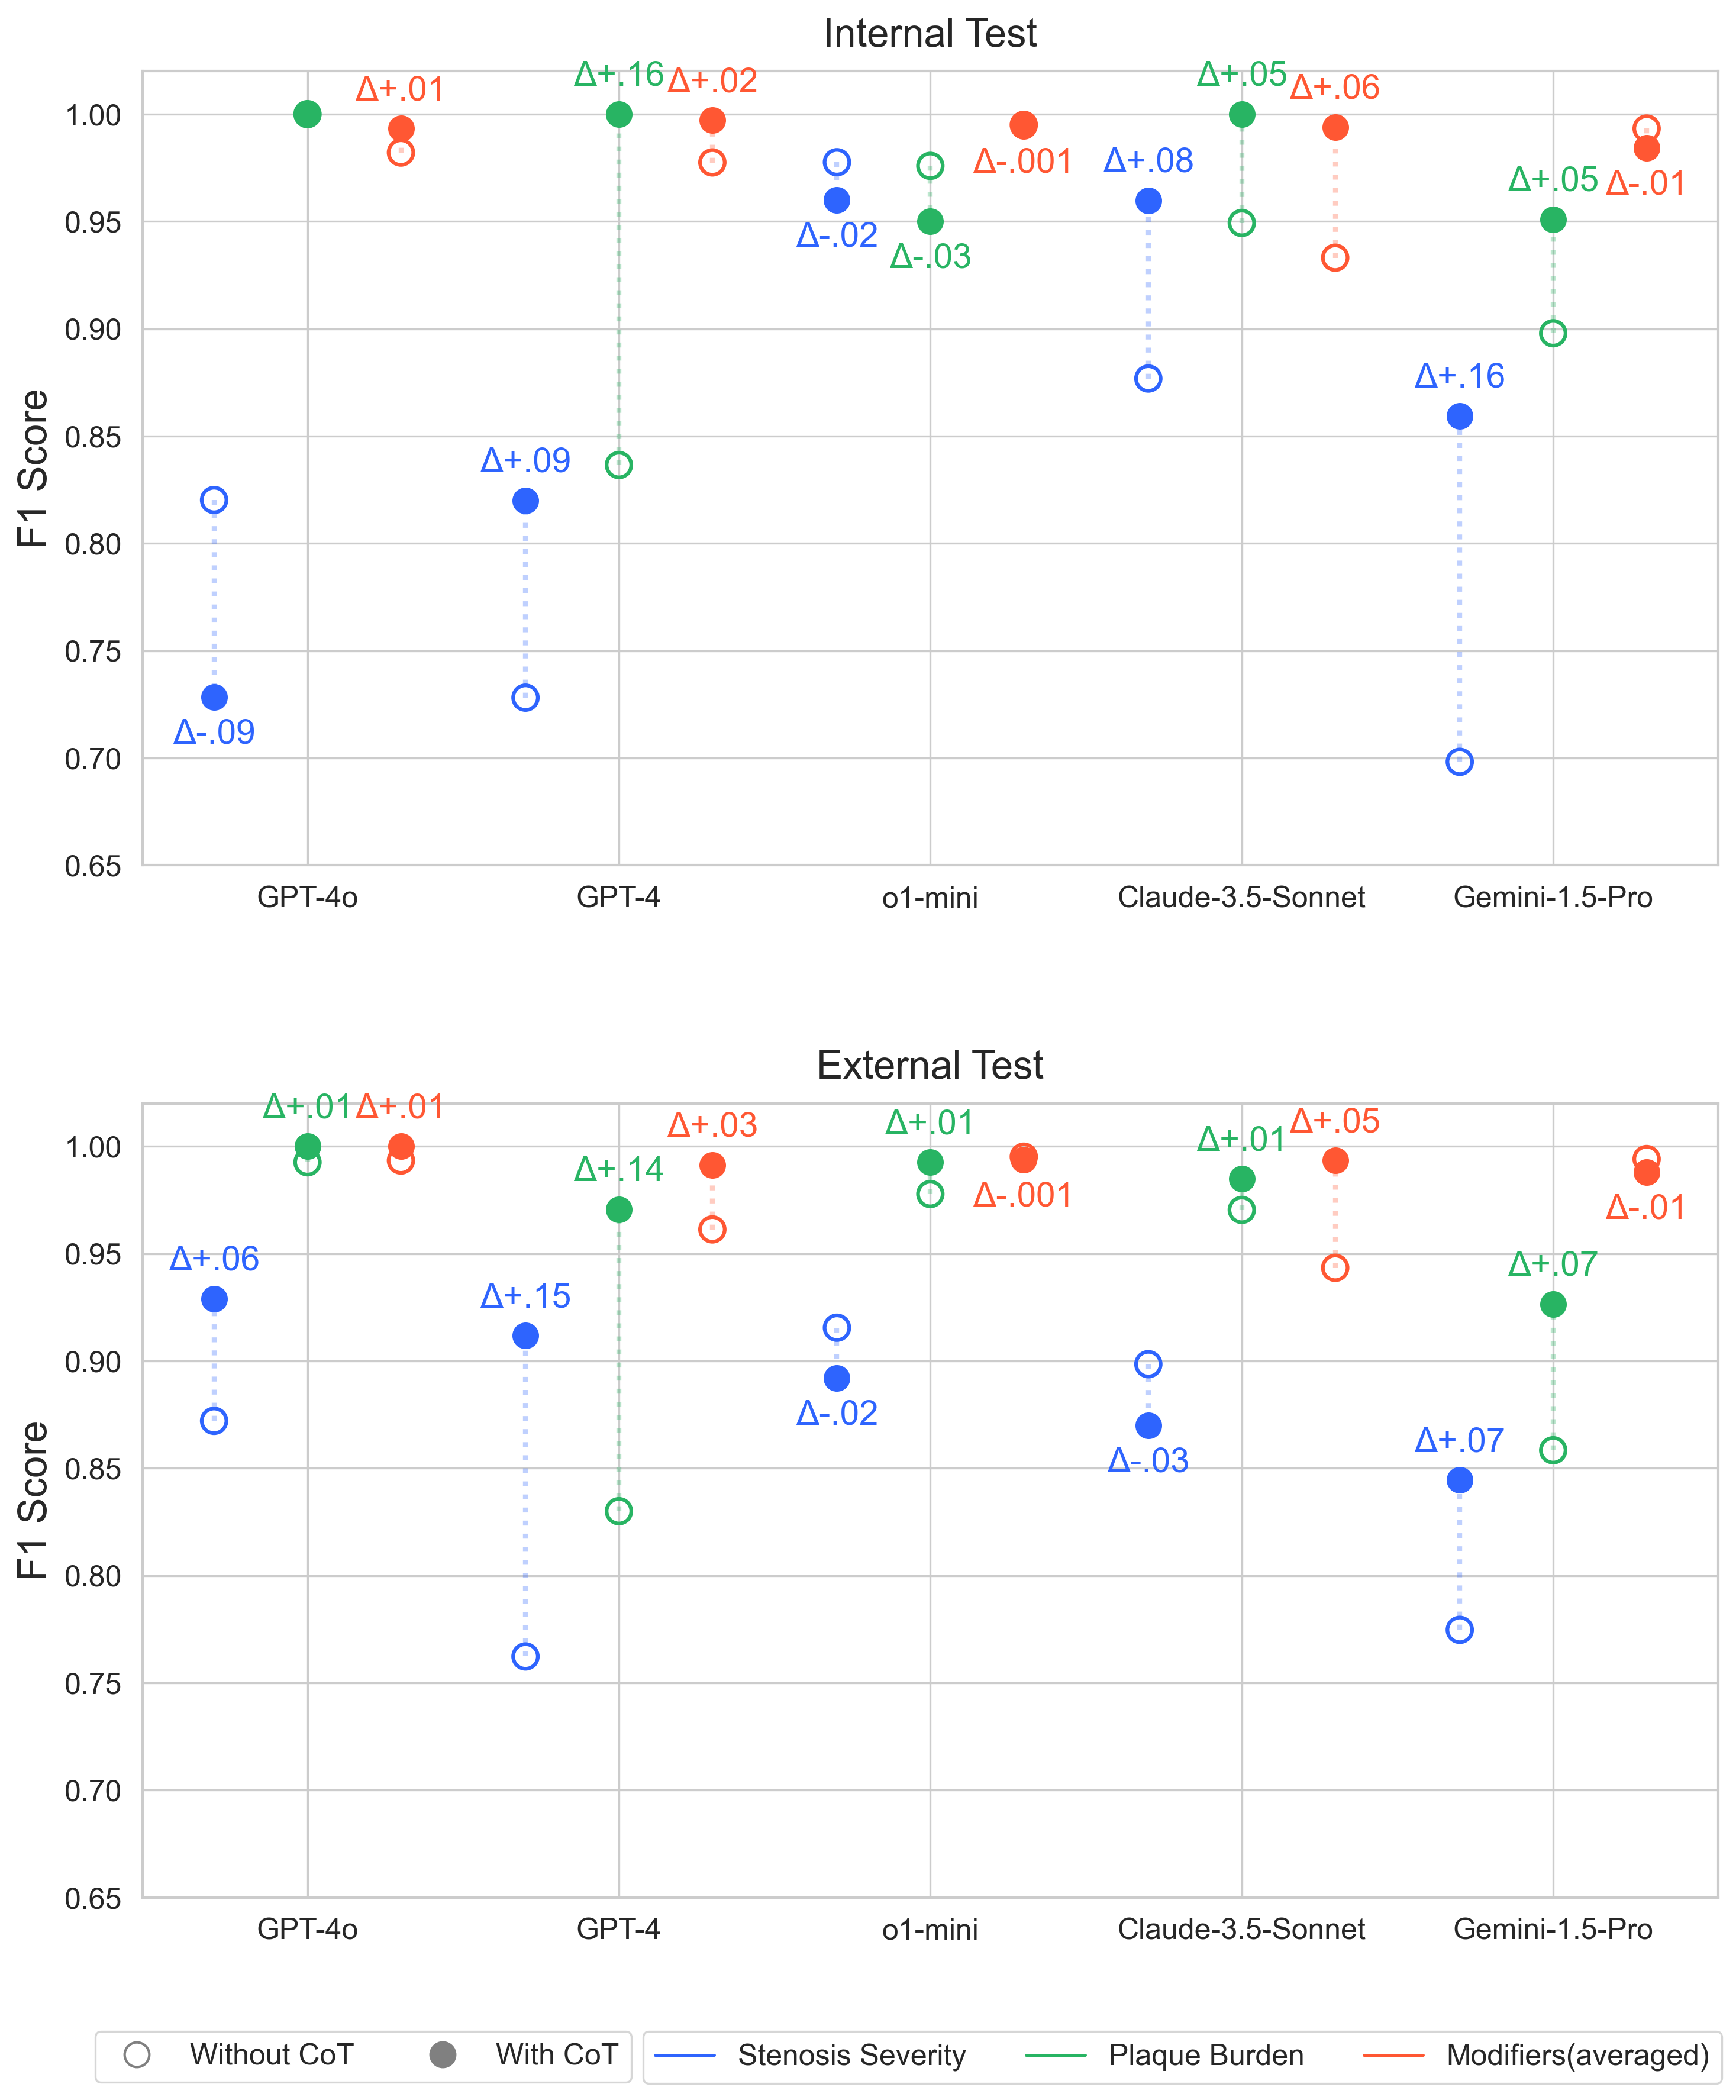

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Style settings
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

# Data preparation
metrics = ['Stenosis Severity', 'Plaque Burden', 'Modifiers(averaged)']
models = ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro']

# Internal test data
internal_without_cot = {
    'Stenosis Severity': [0.8202, 0.7281, 0.9776, 0.8768, 0.6982],
    'Plaque Burden': [1.0000, 0.8365, 0.9759, 0.9493, 0.8979],
    'Modifiers(averaged)': [0.9821, 0.9775, 0.9950, 0.9331, 0.9933]
}
internal_with_cot = {
    'Stenosis Severity': [0.7283, 0.8200, 0.9600, 0.9598, 0.8594],
    'Plaque Burden': [1.0000, 1.0000, 0.9500, 1.0000, 0.9510],
    'Modifiers(averaged)': [0.9933, 0.9972, 0.9944, 0.9940, 0.9842]
}

# External test data
external_without_cot = {
    'Stenosis Severity': [0.8721, 0.7623, 0.9155, 0.8985, 0.7747],
    'Plaque Burden': [0.9926, 0.8300, 0.9778, 0.9704, 0.8584],
    'Modifiers(averaged)': [0.9934, 0.9613, 0.9952, 0.9434, 0.9941]
}
external_with_cot = {
    'Stenosis Severity': [0.9290, 0.9118, 0.8919, 0.8700, 0.8445],
    'Plaque Burden': [1.0000, 0.9707, 0.9926, 0.9849, 0.9266],
    'Modifiers(averaged)': [1, 0.9913, 0.9938, 0.9934, 0.9881]
}

def format_delta(delta):
    abs_delta = abs(delta)
    if abs_delta < 0.005:
        return f"{abs_delta:.3f}"[2:5]
    else:
        return f"{abs_delta:.2f}"[2:4]

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), dpi=300)

# Colors for metrics
metric_colors = ['#2E64FE', '#28B463', '#FF5733']  # Blue, Green, Orange

# Plot data for both subplots
datasets = [
    ('Internal Test', internal_without_cot, internal_with_cot),
    ('External Test', external_without_cot, external_with_cot)
]

for ax_idx, (title, without_cot, with_cot) in enumerate(datasets):
    ax = axes[ax_idx]
    
    # Offset for different metrics
    offset = 0.18
    x = np.arange(len(models)) * 0.6

    for idx, (metric, color) in enumerate(zip(metrics, metric_colors)):
        # Calculate x positions with offset
        x_pos = x + (idx - 1) * offset
        
        # Plot points and lines for each model
        for i, model in enumerate(models):
            without_cot_val = without_cot[metric][i]
            with_cot_val = with_cot[metric][i]
            delta = with_cot_val - without_cot_val
            
            # Plot connecting line
            ax.plot([x_pos[i], x_pos[i]], [without_cot_val, with_cot_val], 
                    color=color, alpha=0.3, zorder=1, linestyle=':', linewidth=2)
            
            # Plot scatter points
            ax.scatter(x_pos[i], without_cot_val, color='none', edgecolor=color, 
                      s=100, linewidth=1.5, zorder=2)
            ax.scatter(x_pos[i], with_cot_val, color=color, 
                      s=100, zorder=2)
            
            # Add delta labels
            if abs(delta) > 1e-10:
                formatted_delta = format_delta(delta)
                if delta > 0:
                    delta_text = f'Δ+.{formatted_delta}'
                    y_pos = with_cot_val + 0.01
                    va = 'bottom'
                else:
                    delta_text = f'Δ-.{formatted_delta}'
                    y_pos = with_cot_val - 0.01
                    va = 'top'
                ax.text(x_pos[i], y_pos, delta_text, 
                       ha='center', va=va, fontsize=14, color=color)

    # Customize subplot
    ax.set_ylabel('F1 Score')
    ax.set_title(title, pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=0)
    ax.set_ylim([0.65, 1.02])

# Create legends (only for bottom subplot)
# Legend for metrics
metric_legend = [plt.Line2D([0], [0], color=color, label=metric) 
                for metric, color in zip(metrics, metric_colors)]

# Legend for CoT
cot_legend = [
    plt.Line2D([0], [0], marker='o', color='gray', 
               markeredgecolor='gray', markerfacecolor='none',
               label='Without CoT', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='gray',
               markerfacecolor='gray', 
               label='With CoT', markersize=10, linestyle='None')
]

# Create two legend boxes at the bottom of the figure
first_legend = axes[1].legend(handles=metric_legend,
                            loc='upper center', bbox_to_anchor=(0.66, -0.15),
                            ncol=len(metrics))
axes[1].add_artist(first_legend)

# Add second legend box
axes[1].legend(handles=cot_legend, 
               loc='upper center', bbox_to_anchor=(0.14, -0.15),
               ncol=2)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, hspace=0.3)

plt.show()

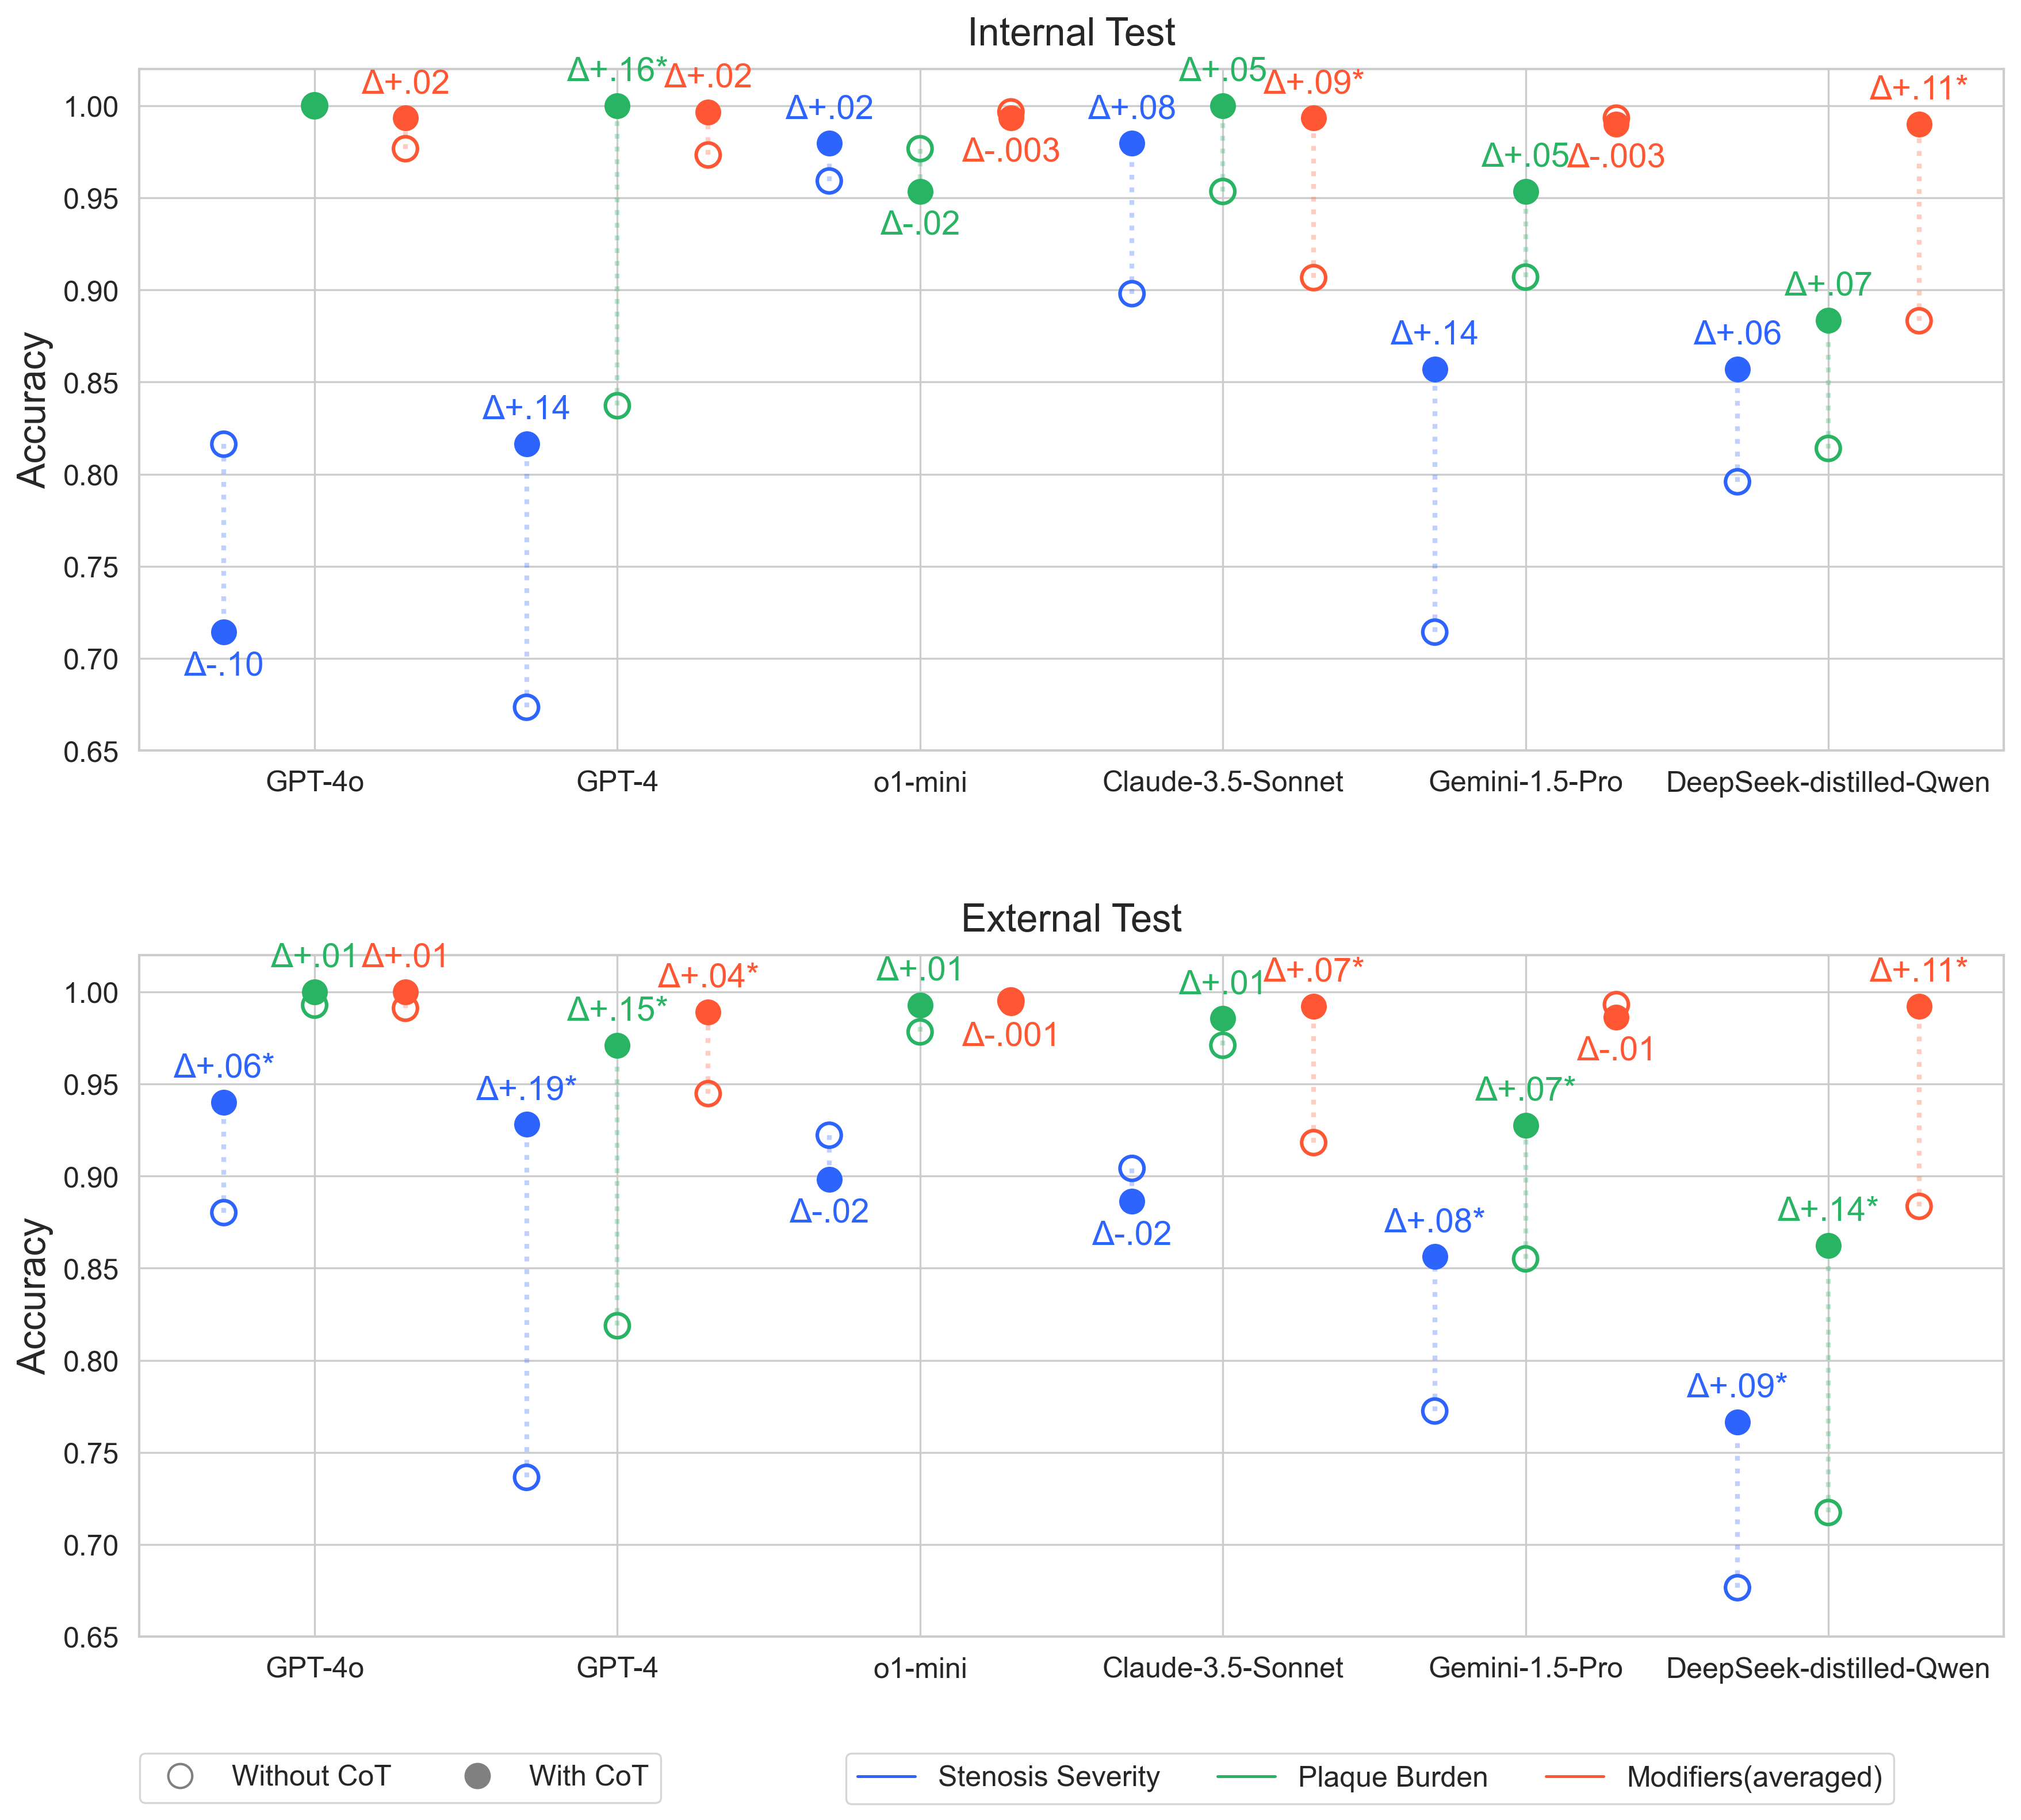

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Style settings
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

# Data preparation
metrics = ['Stenosis Severity', 'Plaque Burden', 'Modifiers(averaged)']
models = ['GPT-4o', 'GPT-4', 'o1-mini', 'Claude-3.5-Sonnet', 'Gemini-1.5-Pro', 'DeepSeek-distilled-Qwen']

# Add significance dictionary
significance = {
    'Internal Test': {
        'Stenosis Severity': [False, False, False, False, False, False],
        'Plaque Burden': [False, True, False, False, False, False],
        'Modifiers(averaged)': [False, False, False, True, False, True]
    },
    'External Test': {
        'Stenosis Severity': [True, True, False, False, True, True],
        'Plaque Burden': [False, True, False, False, True, True],
        'Modifiers(averaged)': [False, True, False, True, False, True]
    }
}

# Internal test data
internal_without_cot = {
    'Stenosis Severity': [0.8163, 0.6735, 0.9592, 0.8980, 0.7143, 0.7959],
    'Plaque Burden': [1.0000, 0.8372, 0.9767, 0.9535, 0.9070, 0.814],
    'Modifiers(averaged)': [0.9767, 0.9733, 0.9967, 0.9067, 0.9933, 0.8833]
}
internal_with_cot = {
    'Stenosis Severity': [0.7143, 0.8163, 0.9796, 0.9796, 0.8571, 0.8571],
    'Plaque Burden': [1.0000, 1.0000, 0.9535, 1.0000, 0.9535, 0.8837],
    'Modifiers(averaged)': [0.9933, 0.9967, 0.9933, 0.9933, 0.9900, 0.99]
}

# External test data
external_without_cot = {
    'Stenosis Severity': [0.8802, 0.7365, 0.9222, 0.9042, 0.7725, 0.6766],
    'Plaque Burden': [0.9928, 0.8188, 0.9783, 0.9710, 0.8551, 0.7174],
    'Modifiers(averaged)': [0.9911, 0.9448, 0.9951, 0.9182, 0.9931, 0.8836]
}
external_with_cot = {
    'Stenosis Severity': [0.9401, 0.9281, 0.8982, 0.8862, 0.8563, 0.7665],
    'Plaque Burden': [1., 0.9710, 0.9928, 0.9855, 0.9275, 0.8623],
    'Modifiers(averaged)': [1, 0.9892, 0.9941, 0.9921, 0.9862, 0.9921]
}
def format_delta(delta):
    abs_delta = abs(delta)
    if abs_delta < 0.005:
        return f"{abs_delta:.3f}"[2:5]
    else:
        return f"{abs_delta:.2f}"[2:4]

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12), dpi=300)

# Colors for metrics
metric_colors = ['#2E64FE', '#28B463', '#FF5733']  # Blue, Green, Orange

# Plot data for both subplots
datasets = [
    ('Internal Test', internal_without_cot, internal_with_cot),
    ('External Test', external_without_cot, external_with_cot)
]

for ax_idx, (title, without_cot, with_cot) in enumerate(datasets):
    ax = axes[ax_idx]
    
    # Offset for different metrics
    offset = 0.18
    x = np.arange(len(models)) * 0.6

    for idx, (metric, color) in enumerate(zip(metrics, metric_colors)):
        # Calculate x positions with offset
        x_pos = x + (idx - 1) * offset
        
        # Plot points and lines for each model
        for i, model in enumerate(models):
            without_cot_val = without_cot[metric][i]
            with_cot_val = with_cot[metric][i]
            delta = with_cot_val - without_cot_val
            
            # Plot connecting line
            ax.plot([x_pos[i], x_pos[i]], [without_cot_val, with_cot_val], 
                    color=color, alpha=0.3, zorder=1, linestyle=':', linewidth=2)
            
            # Plot scatter points
            ax.scatter(x_pos[i], without_cot_val, color='none', edgecolor=color, 
                      s=100, linewidth=1.5, zorder=2)
            ax.scatter(x_pos[i], with_cot_val, color=color, 
                      s=100, zorder=2)
            
            # Add delta labels
            if abs(delta) > 1e-10:
                formatted_delta = format_delta(delta)
                # Add star for statistical significance
                star = '*' if significance[title][metric][i] else ''
                if delta > 0:
                    delta_text = f'Δ+.{formatted_delta}{star}'
                    y_pos = with_cot_val + 0.01
                    va = 'bottom'
                else:
                    delta_text = f'Δ-.{formatted_delta}{star}'
                    y_pos = with_cot_val - 0.01
                    va = 'top'
                ax.text(x_pos[i], y_pos, delta_text, 
                       ha='center', va=va, fontsize=14, color=color)

    # Customize subplot
    ax.set_ylabel('Accuracy')
    ax.set_title(title, pad=10)
    ax.set_xticks(x)
    # ax.set_xticklabels(models, rotation=45, ha='right')  # Changed rotation for better readability
    ax.set_xticklabels(models, rotation=0)

    ax.set_ylim([0.65, 1.02])

# Create legends (only for bottom subplot)
# Legend for metrics
metric_legend = [plt.Line2D([0], [0], color=color, label=metric) 
                for metric, color in zip(metrics, metric_colors)]

# Legend for CoT
cot_legend = [
    plt.Line2D([0], [0], marker='o', color='gray', 
               markeredgecolor='gray', markerfacecolor='none',
               label='Without CoT', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='gray',
               markerfacecolor='gray', 
               label='With CoT', markersize=10, linestyle='None')
]

# Create two legend boxes at the bottom of the figure
first_legend = axes[1].legend(handles=metric_legend,
                            loc='upper center', bbox_to_anchor=(0.66, -0.15),
                            ncol=len(metrics))
axes[1].add_artist(first_legend)

# Add second legend box
axes[1].legend(handles=cot_legend, 
               loc='upper center', bbox_to_anchor=(0.14, -0.15),
               ncol=2)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, hspace=0.3)  # Increased bottom margin for rotated labels

plt.show()